## 이커머스 고객 세분화 분석 아이디어 경진대회

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

online = pd.read_csv('Onlinesales_info.csv')
cust = pd.read_csv('Customer_info.csv')
discount = pd.read_csv('Discount_info.csv')
marketing = pd.read_csv('Marketing_info.csv')
Tax = pd. read_csv('Tax_info.csv')

In [127]:
discount

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [130]:
discount

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


C:\Users\DOHS\AppData\Local\Temp\ipykernel_31148\3683644162.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


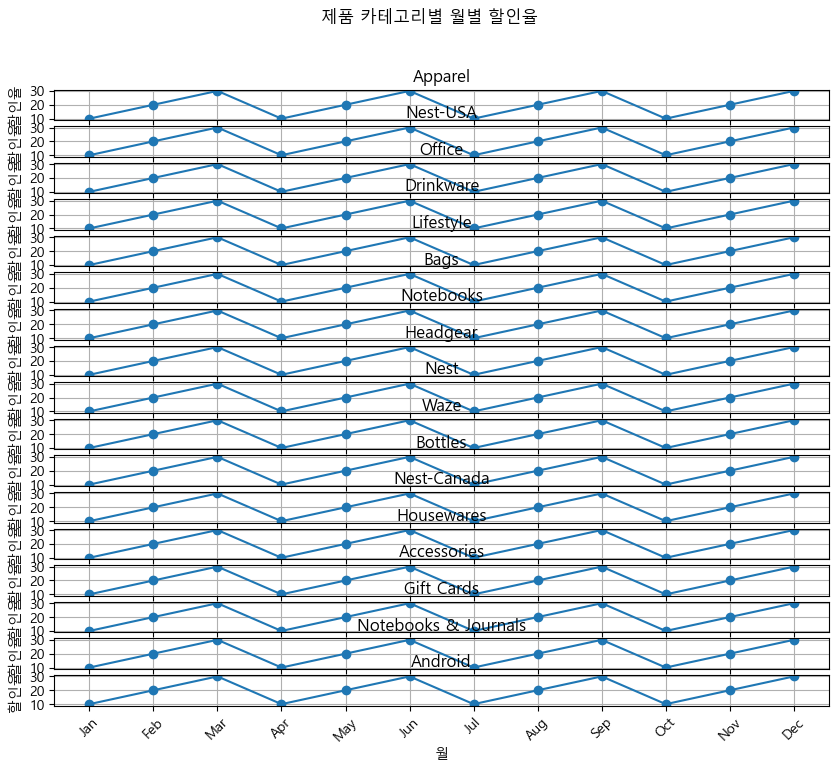

In [131]:
# 각 제품 카테고리별로 그래프를 그리기 위해 서브플롯 사용
fig, axs = plt.subplots(nrows=len(discount['제품카테고리'].unique()), figsize=(10, 8), sharex=True)

# 그룹 별로 그래프 그리기
for i, category in enumerate(discount['제품카테고리'].unique()):
    data = discount[discount['제품카테고리'] == category]
    axs[i].plot(data['월'], data['할인율'], marker='o')
    axs[i].set_title(category)
    axs[i].set_ylabel('할인율')
    axs[i].grid(True)

# x축 레이블과 제목 설정
plt.xlabel('월')
plt.suptitle('제품 카테고리별 월별 할인율')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [5]:
cust

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [6]:
df = pd.merge(online, cust, how='left')
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [7]:
# 데이터프레임의 결측치 확인

def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("결측치가 없습니다.")
    else:
        print("각 열의 결측치 수:")
        print(missing_values)

check_missing_values(df)

결측치가 없습니다.


In [8]:
obj_col = df.select_dtypes('object').columns.tolist()

for col in obj_col:
  print(f'변수 [{col}]의 고유값 개수 : {df[col].nunique()}')

변수 [고객ID]의 고유값 개수 : 1468
변수 [거래ID]의 고유값 개수 : 25061
변수 [거래날짜]의 고유값 개수 : 365
변수 [제품ID]의 고유값 개수 : 1145
변수 [제품카테고리]의 고유값 개수 : 20
변수 [쿠폰상태]의 고유값 개수 : 3
변수 [성별]의 고유값 개수 : 2
변수 [고객지역]의 고유값 개수 : 5


In [9]:
# 1회 구매 시 구매한 가격 feature
df['가격'] = df['수량']*df['평균금액']+df['배송료']
df['물건가격'] = df['수량']*df['평균금액']
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,가격,물건가격
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,160.21,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,160.21,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,8.55,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,94.15,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,23.00,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,127.80,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,55.42,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,158.38,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,409.10,402.60


## RFMV 고객 분석을 통한 클러스터링

**클러스터링을 통해 고객군을 분류하고 고객군별 EDA를 통해서 각 고객군의 재구매를 위한 방안을 제시한다.**

기존 RFM에서 발전한 LRFMV에서 L을 제외한 RFMV를 통해 분석, L은 1년간의 데이터이며 F가 1인 데이터가 많은 본 데이터에는 적합하지 않다고 판단하여 제외

* R(Recency): 최근 방문한 날 / F(Frequency): 구매한 횟수 / M(monetary): 구매한 물품들의 총 가격 / V(volume): 하루 평균 구매한 물품 수량의 평균
* https://dacon.io/competitions/official/236222/codeshare/9811?page=1&dtype=random

In [10]:
# 원본 데이터셋 복사
rfm_online_sales = online.copy()

# 날짜 형식 변환
rfm_online_sales['거래날짜'] = pd.to_datetime(rfm_online_sales['거래날짜'])

# 데이터 내 마지막 날짜 계산
last_date = rfm_online_sales['거래날짜'].max()

# Recency 계산
recency_data = rfm_online_sales.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['거래날짜']).dt.days

# Frequency 계산
frequency_data = rfm_online_sales.groupby('고객ID')['거래ID'].count().reset_index()
frequency_data.rename(columns={'거래ID': 'Frequency'}, inplace=True)

# Monetary 계산
rfm_online_sales['SalesValue'] = rfm_online_sales['수량'] * rfm_online_sales['평균금액']
monetary_data = rfm_online_sales.groupby('고객ID')['SalesValue'].sum().reset_index()
monetary_data.rename(columns={'SalesValue': 'Monetary'}, inplace=True)

# RFM 데이터 결합
rfm_data = recency_data.merge(frequency_data, on='고객ID').merge(monetary_data, on='고객ID')
rfm_data

,고객ID,거래날짜,Recency,Frequency,Monetary
0,USER_0000,2019-09-15,107,2,30.99
1,USER_0001,2019-11-02,59,60,13834.90
2,USER_0002,2019-10-19,73,23,1442.12
3,USER_0003,2019-12-14,17,17,1360.07
4,USER_0004,2019-09-15,107,36,1442.47
...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,544.34
1464,USER_1464,2019-10-05,87,40,2363.05
1465,USER_1465,2019-06-20,194,8,101.56
1466,USER_1466,2019-10-23,69,1,298.00


In [11]:
data = df[['고객ID', '거래날짜', '물건가격','성별','고객지역','가입기간', '수량']]
data = data.reset_index(drop=True)
data

,고객ID,거래날짜,물건가격,성별,고객지역,가입기간,수량
0,USER_1358,2019-01-01,153.71,남,Chicago,12,1
1,USER_1358,2019-01-01,153.71,남,Chicago,12,1
2,USER_1358,2019-01-01,2.05,남,Chicago,12,1
3,USER_1358,2019-01-01,87.65,남,Chicago,12,5
4,USER_1358,2019-01-01,16.50,남,Chicago,12,1
...,...,...,...,...,...,...,...
52919,USER_0504,2019-12-31,121.30,여,New York,45,1
52920,USER_0504,2019-12-31,48.92,여,New York,45,1
52921,USER_0504,2019-12-31,151.88,여,New York,45,1
52922,USER_0562,2019-12-31,402.60,여,California,7,5


In [12]:
price = df[['고객ID', '거래날짜', '물건가격']]
price = price.reset_index(drop=True)
price

,고객ID,거래날짜,물건가격
0,USER_1358,2019-01-01,153.71
1,USER_1358,2019-01-01,153.71
2,USER_1358,2019-01-01,2.05
3,USER_1358,2019-01-01,87.65
4,USER_1358,2019-01-01,16.50
...,...,...,...
52919,USER_0504,2019-12-31,121.30
52920,USER_0504,2019-12-31,48.92
52921,USER_0504,2019-12-31,151.88
52922,USER_0562,2019-12-31,402.60


In [13]:
su = price.groupby(['고객ID', '거래날짜']).sum()
su.columns = ['물품가격']
su

물품가격
고객ID      거래날짜                
USER_0000 2019-09-15     30.99
USER_0001 2019-03-24  11216.05
          2019-11-01     29.54
          2019-11-02   2589.31
USER_0002 2019-06-22    777.03
...                        ...
USER_1465 2019-04-05     86.87
          2019-06-20     14.69
USER_1466 2019-10-23    298.00
USER_1467 2019-07-29   1921.20
          2019-10-10   4441.57

[3208 rows x 1 columns]

In [14]:
df_1 = su.merge(data.drop('물건가격', axis=1), left_index=True, right_on=['고객ID', '거래날짜'])
df_1 = df_1.drop_duplicates()
df_1.reset_index(inplace=True)
df_1 = df_1.drop(columns='index')
df_1

,물품가격,고객ID,거래날짜,성별,고객지역,가입기간,수량
0,30.99,USER_0000,2019-09-15,여,New York,31,1
1,30.99,USER_0000,2019-09-15,여,New York,31,2
2,11216.05,USER_0001,2019-03-24,남,New York,20,1
3,11216.05,USER_0001,2019-03-24,남,New York,20,5
4,11216.05,USER_0001,2019-03-24,남,New York,20,4
...,...,...,...,...,...,...,...
11336,4441.57,USER_1467,2019-10-10,여,New Jersey,36,1
11337,4441.57,USER_1467,2019-10-10,여,New Jersey,36,3
11338,4441.57,USER_1467,2019-10-10,여,New Jersey,36,2
11339,4441.57,USER_1467,2019-10-10,여,New Jersey,36,5


In [15]:
f_data = pd.DataFrame(df_1['고객ID'].value_counts())
f_data.columns = ['F']
f_data

,F
고객ID,
USER_0118,147
USER_0563,108
USER_0643,107
USER_1355,107
USER_0736,106
...,...
USER_0153,1
USER_1142,1
USER_1368,1


In [16]:
# RFM 데이터 결합
rfm_data = rfm_data.merge(f_data, on='고객ID')
rfm_data

,고객ID,거래날짜,Recency,Frequency,Monetary,F
0,USER_0000,2019-09-15,107,2,30.99,2
1,USER_0001,2019-11-02,59,60,13834.90,16
2,USER_0002,2019-10-19,73,23,1442.12,11
3,USER_0003,2019-12-14,17,17,1360.07,3
4,USER_0004,2019-09-15,107,36,1442.47,4
...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,544.34,4
1464,USER_1464,2019-10-05,87,40,2363.05,11
1465,USER_1465,2019-06-20,194,8,101.56,3
1466,USER_1466,2019-10-23,69,1,298.00,1


In [17]:
rfm_data = rfm_data.drop('Frequency', axis = 1)
rfm_data

,고객ID,거래날짜,Recency,Monetary,F
0,USER_0000,2019-09-15,107,30.99,2
1,USER_0001,2019-11-02,59,13834.90,16
2,USER_0002,2019-10-19,73,1442.12,11
3,USER_0003,2019-12-14,17,1360.07,3
4,USER_0004,2019-09-15,107,1442.47,4
...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,544.34,4
1464,USER_1464,2019-10-05,87,2363.05,11
1465,USER_1465,2019-06-20,194,101.56,3
1466,USER_1466,2019-10-23,69,298.00,1


V 만들기

In [18]:
# Volume
data_n = online.groupby(['고객ID'])['거래날짜'].nunique().reset_index()
data_x = online.groupby(['고객ID','거래날짜'])['거래ID'].count().reset_index()
data_q = online.groupby(['고객ID','거래날짜'])['수량'].sum().reset_index()
data_xq = data_x.merge(data_q, on=['고객ID','거래날짜'])
data_xq['q/x'] = data_xq['수량']/data_xq['거래ID']
data_v = data_xq.groupby('고객ID')['q/x'].sum().reset_index()
lrfm_v = data_v.merge(data_n, on=['고객ID'])
lrfm_v['V'] = lrfm_v['q/x']/lrfm_v['거래날짜']
lrfm_v = lrfm_v[['고객ID','V']]
lrfm_v

,고객ID,V
0,USER_0000,1.500000
1,USER_0001,4.192903
2,USER_0002,13.911765
3,USER_0003,1.235294
4,USER_0004,1.555556
...,...,...
1463,USER_1463,6.571429
1464,USER_1464,3.041958
1465,USER_1465,1.142857
1466,USER_1466,2.000000


In [19]:
data_n

,고객ID,거래날짜
0,USER_0000,1
1,USER_0001,3
2,USER_0002,2
3,USER_0003,1
4,USER_0004,1
...,...,...
1463,USER_1463,1
1464,USER_1464,3
1465,USER_1465,2
1466,USER_1466,1


In [20]:
# RFM 데이터 결합
rfmv_data = rfm_data.merge(lrfm_v, on='고객ID')
rfmv_data

,고객ID,거래날짜,Recency,Monetary,F,V
0,USER_0000,2019-09-15,107,30.99,2,1.500000
1,USER_0001,2019-11-02,59,13834.90,16,4.192903
2,USER_0002,2019-10-19,73,1442.12,11,13.911765
3,USER_0003,2019-12-14,17,1360.07,3,1.235294
4,USER_0004,2019-09-15,107,1442.47,4,1.555556
...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,544.34,4,6.571429
1464,USER_1464,2019-10-05,87,2363.05,11,3.041958
1465,USER_1465,2019-06-20,194,101.56,3,1.142857
1466,USER_1466,2019-10-23,69,298.00,1,2.000000


In [21]:
rfmv_data = rfmv_data.drop('거래날짜', axis = 1)
rfmv_data

,고객ID,Recency,Monetary,F,V
0,USER_0000,107,30.99,2,1.500000
1,USER_0001,59,13834.90,16,4.192903
2,USER_0002,73,1442.12,11,13.911765
3,USER_0003,17,1360.07,3,1.235294
4,USER_0004,107,1442.47,4,1.555556
...,...,...,...,...,...
1463,USER_1463,270,544.34,4,6.571429
1464,USER_1464,87,2363.05,11,3.041958
1465,USER_1465,194,101.56,3,1.142857
1466,USER_1466,69,298.00,1,2.000000


In [22]:
rfmv_data.set_index('고객ID', inplace=True)
rfmv_data

,Recency,Monetary,F,V
고객ID,,,,
USER_0000,107,30.99,2,1.500000
USER_0001,59,13834.90,16,4.192903
USER_0002,73,1442.12,11,13.911765
USER_0003,17,1360.07,3,1.235294
USER_0004,107,1442.47,4,1.555556
...,...,...,...,...
USER_1463,270,544.34,4,6.571429
USER_1464,87,2363.05,11,3.041958
USER_1465,194,101.56,3,1.142857


## T-SNE를 통한 차원 축소 및 DBSCAN을 이용한 클러스터링
**고객군 분류 알고리즘**

참고
* feature의 수가 너무 많으면 머신 러닝 모델의 성능을 저하시키곤 하고 feature의 갯수가 너무 많으면 overfit이 될 가능성이 있습니다.
* https://gaussian37.github.io/ml-concept-t_sne/
* https://velog.io/@swan9405/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-T-SNE-T-distributed-Stochastic-Neighbor-Embedding

In [23]:
rfmv_data

,Recency,Monetary,F,V
고객ID,,,,
USER_0000,107,30.99,2,1.500000
USER_0001,59,13834.90,16,4.192903
USER_0002,73,1442.12,11,13.911765
USER_0003,17,1360.07,3,1.235294
USER_0004,107,1442.47,4,1.555556
...,...,...,...,...
USER_1463,270,544.34,4,6.571429
USER_1464,87,2363.05,11,3.041958
USER_1465,194,101.56,3,1.142857


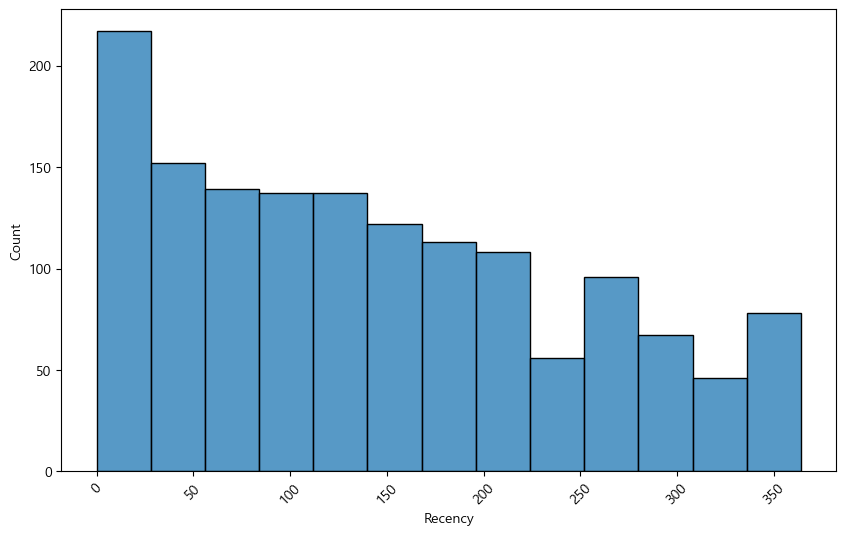

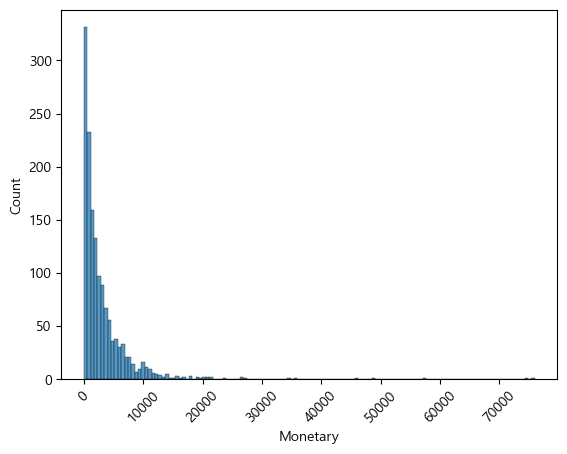

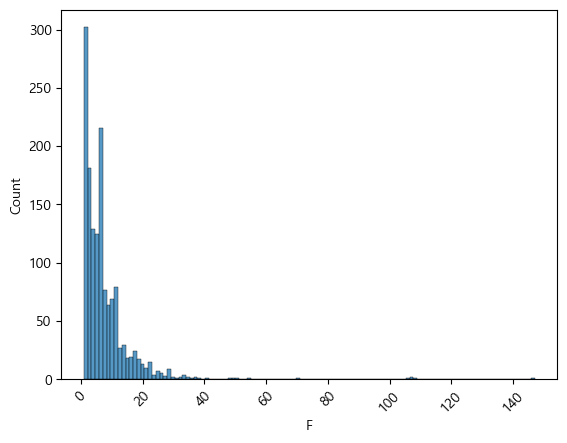

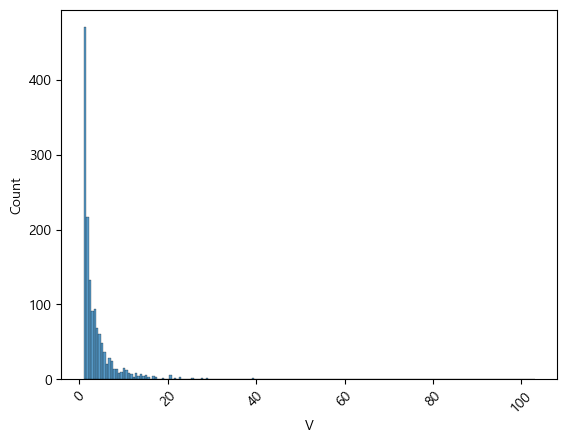

In [24]:
def visual(df):
    plt.figure(figsize=(10, 6))
    for i in df.columns:
        sns.histplot(df[i])
        plt.xticks(rotation=45)
        plt.show()

visual(rfmv_data)

# f,m,v의 skewed 분포 확인 -> 로그 변환의 필요성

### 로그 변환
**큰 수를 작게 만들고, 왜도와 첨도를 줄여 정규성을 높여 분석에서 정확한 값을 얻기 위함**

f,m,v를 변환

C:\Users\DOHS\AppData\Local\Temp\ipykernel_31148\131241874.py:4: RuntimeWarning: divide by zero encountered in log
  sns.histplot(rfmv_data[i].apply(lambda x:np.log(x)))


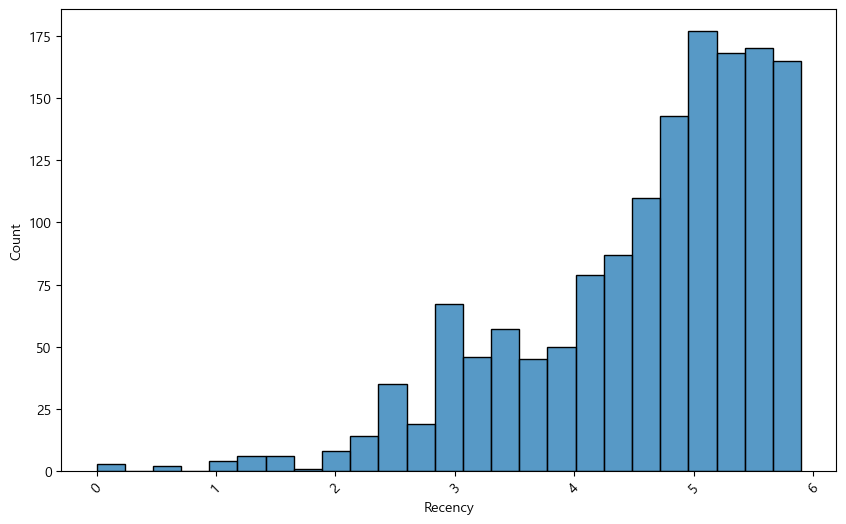

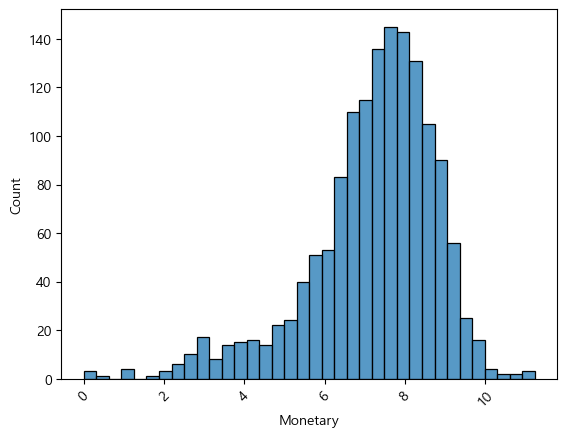

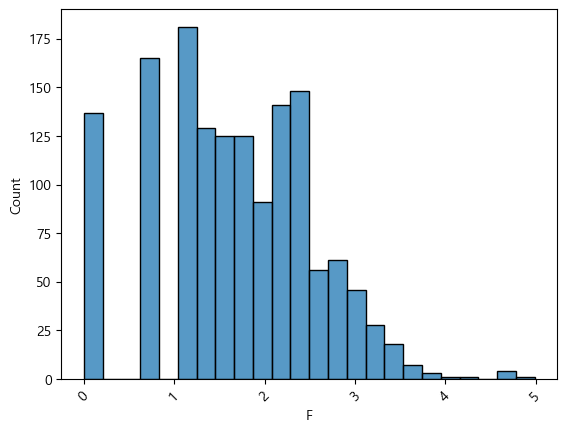

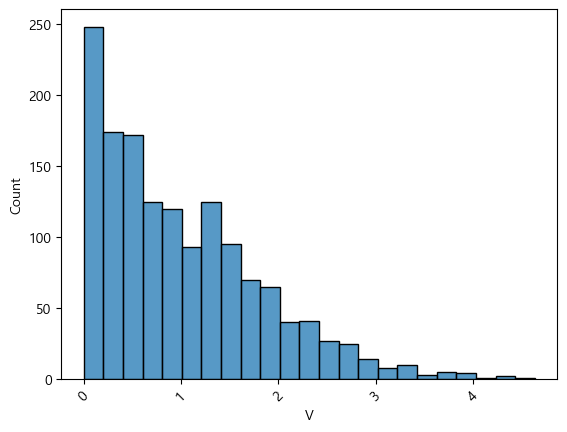

In [25]:
def log_visual(df):
    plt.figure(figsize=(10, 6))
    for i in df.columns:
        sns.histplot(rfmv_data[i].apply(lambda x:np.log(x)))
        plt.xticks(rotation=45)
        plt.show()

log_visual(rfmv_data)

In [26]:
rfmv_data

,Recency,Monetary,F,V
고객ID,,,,
USER_0000,107,30.99,2,1.500000
USER_0001,59,13834.90,16,4.192903
USER_0002,73,1442.12,11,13.911765
USER_0003,17,1360.07,3,1.235294
USER_0004,107,1442.47,4,1.555556
...,...,...,...,...
USER_1463,270,544.34,4,6.571429
USER_1464,87,2363.05,11,3.041958
USER_1465,194,101.56,3,1.142857


In [27]:
rfmv = pd.DataFrame()
rfmv.index = rfmv_data.index
rfmv['R'] = rfmv_data['Recency']
rfmv['M'] = rfmv_data['Monetary'].apply(lambda x:np.log(x))
rfmv['F'] = rfmv_data['F'].apply(lambda x:np.log(x))
rfmv['V'] = rfmv_data['V'].apply(lambda x:np.log(x))
rfmv

,R,M,F,V
고객ID,,,,
USER_0000,107,3.433665,0.693147,0.405465
USER_0001,59,9.534950,2.772589,1.433393
USER_0002,73,7.273870,2.397895,2.632735
USER_0003,17,7.215291,1.098612,0.211309
USER_0004,107,7.274112,1.386294,0.441833
...,...,...,...,...
USER_1463,270,6.299574,1.386294,1.882731
USER_1464,87,7.767708,2.397895,1.112501
USER_1465,194,4.620650,1.098612,0.133531


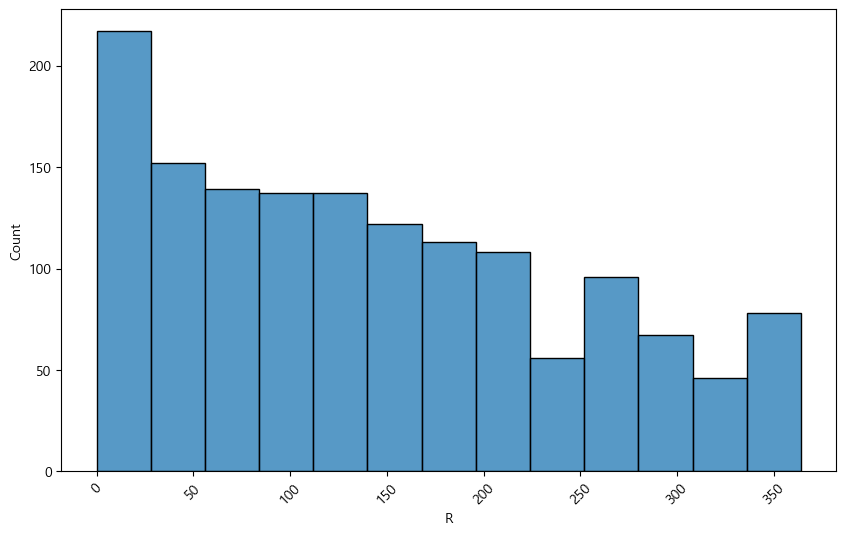

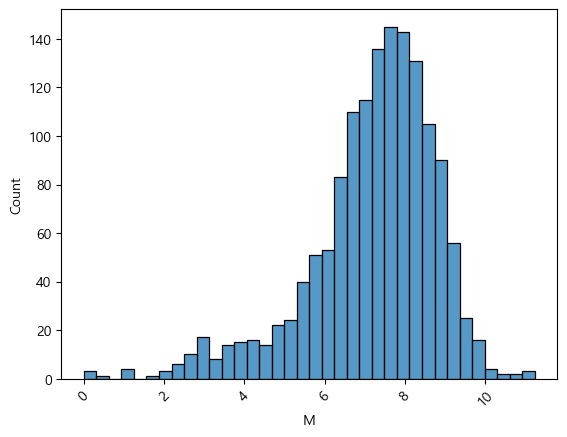

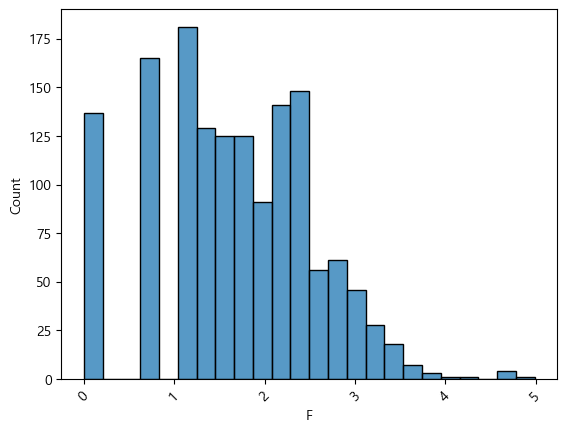

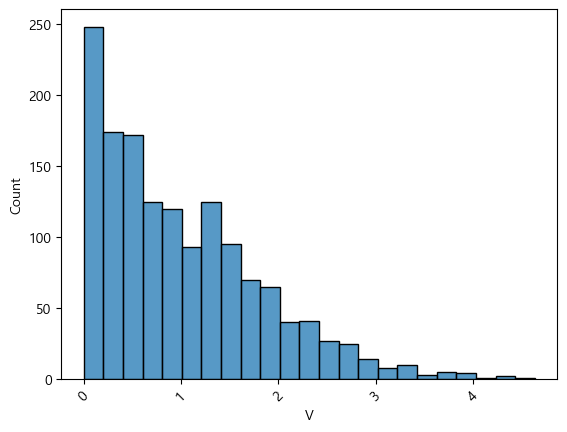

In [28]:
visual(rfmv)

In [29]:
rfmv

,R,M,F,V
고객ID,,,,
USER_0000,107,3.433665,0.693147,0.405465
USER_0001,59,9.534950,2.772589,1.433393
USER_0002,73,7.273870,2.397895,2.632735
USER_0003,17,7.215291,1.098612,0.211309
USER_0004,107,7.274112,1.386294,0.441833
...,...,...,...,...
USER_1463,270,6.299574,1.386294,1.882731
USER_1464,87,7.767708,2.397895,1.112501
USER_1465,194,4.620650,1.098612,0.133531


### T-SNE 적용

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0, n_iter=10000)
tp = tsne.fit_transform(rfmv_data)
tp = pd.DataFrame(tp,columns=['x','y','z'])
tp.index = rfmv.index
tp

,x,y,z
고객ID,,,
USER_0000,-14.221454,-15.377161,4.374270
USER_0001,34.565876,-7.918527,5.907986
USER_0002,0.202626,7.745917,-1.310352
USER_0003,0.810980,7.247405,-3.362223
USER_0004,-0.482021,7.668267,-1.104650
...,...,...,...
USER_1463,-13.965676,-5.906229,-8.470598
USER_1464,5.041756,-2.410028,10.388309
USER_1465,-16.917061,-13.180199,1.462920


3차원

C:\Users\DOHS\AppData\Local\Temp\ipykernel_31148\866559057.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(scaled_df['x'], scaled_df['y'], scaled_df['z'], c=scaled_df, cmap='viridis', s=20, alpha=0.5)


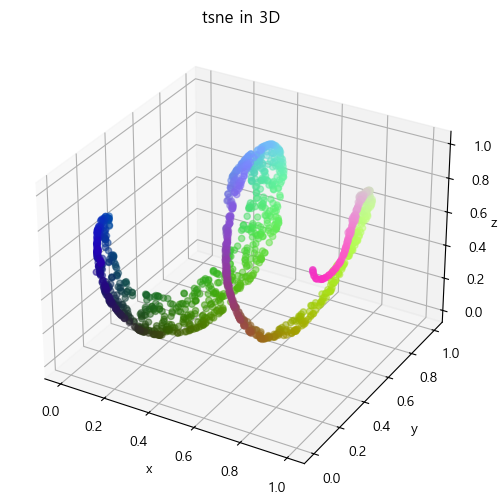

In [31]:
from sklearn.preprocessing import MinMaxScaler
# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tp[['x', 'y', 'z']])
# 스케일링된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=['x', 'y', 'z'])
# 색상 값을 스케일링된 z 값으로 설정
c_values = scaled_df['z']
# 결과 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(scaled_df['x'], scaled_df['y'], scaled_df['z'], c=scaled_df, cmap='viridis', s=20, alpha=0.5)
ax.set_title('tsne in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z', labelpad=0)
ax.tick_params(axis='z', pad=6)

8


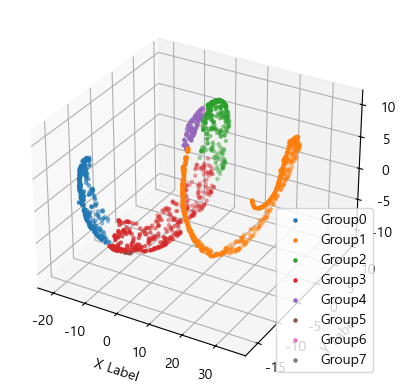

In [32]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
dbscan = DBSCAN(eps=1.1, min_samples=5, metric='euclidean')
prediction = dbscan.fit_predict(tp)
print(len(set(dbscan.labels_)))

tp['label'] = prediction

# figure 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3차원 산점도 그리기
for i in range(0, len(set(dbscan.labels_))):
    ax.scatter(tp[tp['label'] == i]['x'], tp[tp['label'] == i]['y'], tp[tp['label'] == i]['z'], label=f'Group{i}', s=5)

# 라벨 추가
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 범례 추가
ax.legend()

plt.show()

In [33]:
tp.drop('label', axis =1, inplace = True)
tp

,x,y,z
고객ID,,,
USER_0000,-14.221454,-15.377161,4.374270
USER_0001,34.565876,-7.918527,5.907986
USER_0002,0.202626,7.745917,-1.310352
USER_0003,0.810980,7.247405,-3.362223
USER_0004,-0.482021,7.668267,-1.104650
...,...,...,...
USER_1463,-13.965676,-5.906229,-8.470598
USER_1464,5.041756,-2.410028,10.388309
USER_1465,-16.917061,-13.180199,1.462920


2차원

1


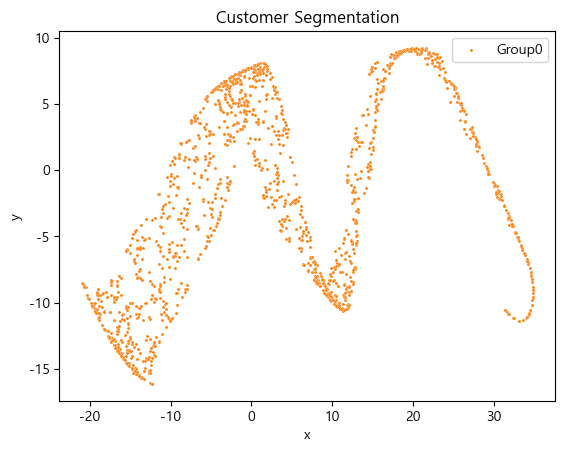

In [34]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=5, metric='euclidean')
prediction = dbscan.fit_predict(tp)
print(len(set(dbscan.labels_)))

tp['label'] = prediction

for i in range(-1,len(set(dbscan.labels_))):
    sns.scatterplot(data=tp[tp['label']==i],x='x',y='y',s=5, label = f'Group{i}')
    
tp['group'] = prediction
plt.title('Customer Segmentation')
plt.legend()



In [35]:
col = ['label', 'group']
tp.drop(col, axis =1, inplace = True)
tp

,x,y,z
고객ID,,,
USER_0000,-14.221454,-15.377161,4.374270
USER_0001,34.565876,-7.918527,5.907986
USER_0002,0.202626,7.745917,-1.310352
USER_0003,0.810980,7.247405,-3.362223
USER_0004,-0.482021,7.668267,-1.104650
...,...,...,...
USER_1463,-13.965676,-5.906229,-8.470598
USER_1464,5.041756,-2.410028,10.388309
USER_1465,-16.917061,-13.180199,1.462920


### 클러스터링 결과 살펴보기

In [36]:
tp

,x,y,z
고객ID,,,
USER_0000,-14.221454,-15.377161,4.374270
USER_0001,34.565876,-7.918527,5.907986
USER_0002,0.202626,7.745917,-1.310352
USER_0003,0.810980,7.247405,-3.362223
USER_0004,-0.482021,7.668267,-1.104650
...,...,...,...
USER_1463,-13.965676,-5.906229,-8.470598
USER_1464,5.041756,-2.410028,10.388309
USER_1465,-16.917061,-13.180199,1.462920


In [37]:
tp = pd.read_csv('best.csv',index_col=0)
tp

,x,y,z,label
고객ID,,,,
USER_0000,-14.221454,-15.377161,4.374270,0
USER_0001,34.565876,-7.918527,5.907986,1
USER_0002,0.202626,7.745917,-1.310352,2
USER_0003,0.810980,7.247405,-3.362223,2
USER_0004,-0.482021,7.668267,-1.104650,2
...,...,...,...,...
USER_1463,-13.965676,-5.906230,-8.470598,3
USER_1464,5.041756,-2.410027,10.388309,4
USER_1465,-16.917060,-13.180199,1.462920,0


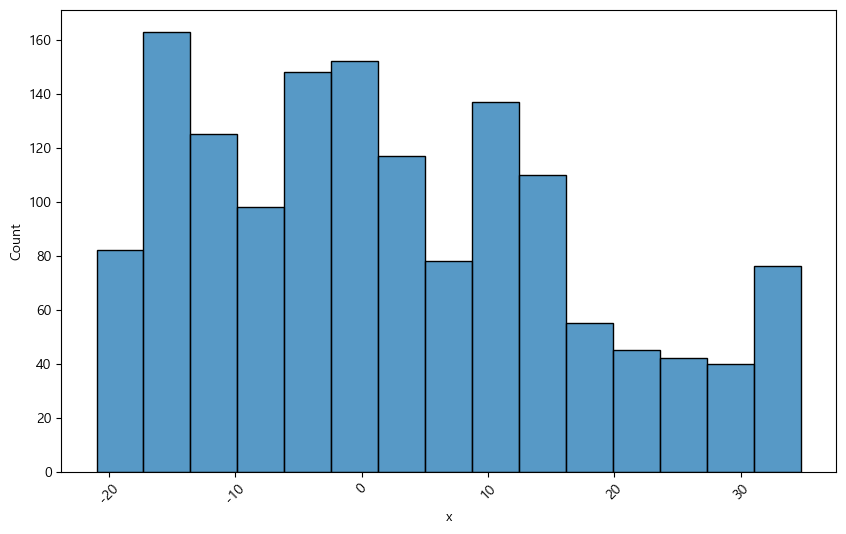

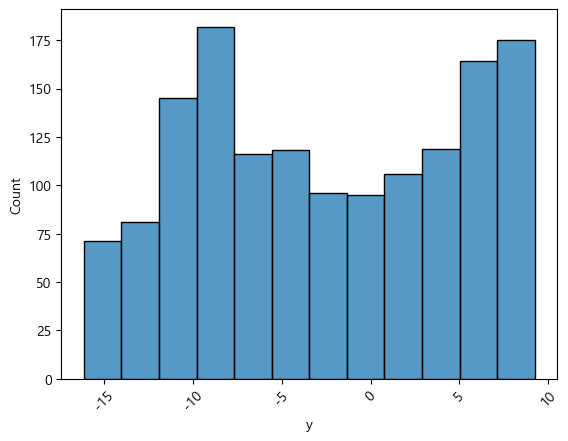

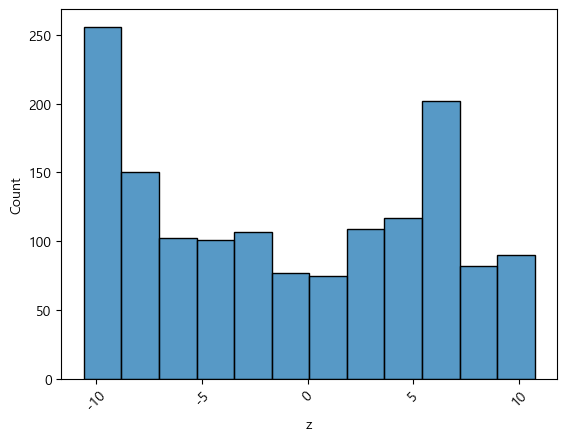

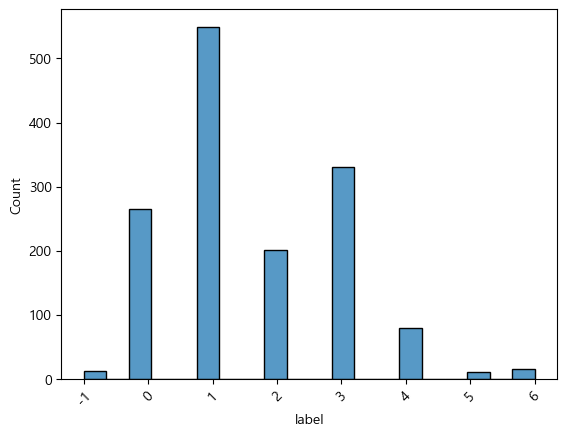

In [38]:
visual(tp)

In [39]:
data = rfmv_data.merge(tp,on='고객ID')
data

,Recency,Monetary,F,V,x,y,z,label
고객ID,,,,,,,,
USER_0000,107,30.99,2,1.500000,-14.221454,-15.377161,4.374270,0
USER_0001,59,13834.90,16,4.192903,34.565876,-7.918527,5.907986,1
USER_0002,73,1442.12,11,13.911765,0.202626,7.745917,-1.310352,2
USER_0003,17,1360.07,3,1.235294,0.810980,7.247405,-3.362223,2
USER_0004,107,1442.47,4,1.555556,-0.482021,7.668267,-1.104650,2
...,...,...,...,...,...,...,...,...
USER_1463,270,544.34,4,6.571429,-13.965676,-5.906230,-8.470598,3
USER_1464,87,2363.05,11,3.041958,5.041756,-2.410027,10.388309,4
USER_1465,194,101.56,3,1.142857,-16.917060,-13.180199,1.462920,0


In [40]:
col = ['x','y','z']
data.drop(col, axis=1, inplace=True)
data

,Recency,Monetary,F,V,label
고객ID,,,,,
USER_0000,107,30.99,2,1.500000,0
USER_0001,59,13834.90,16,4.192903,1
USER_0002,73,1442.12,11,13.911765,2
USER_0003,17,1360.07,3,1.235294,2
USER_0004,107,1442.47,4,1.555556,2
...,...,...,...,...,...
USER_1463,270,544.34,4,6.571429,3
USER_1464,87,2363.05,11,3.041958,4
USER_1465,194,101.56,3,1.142857,0


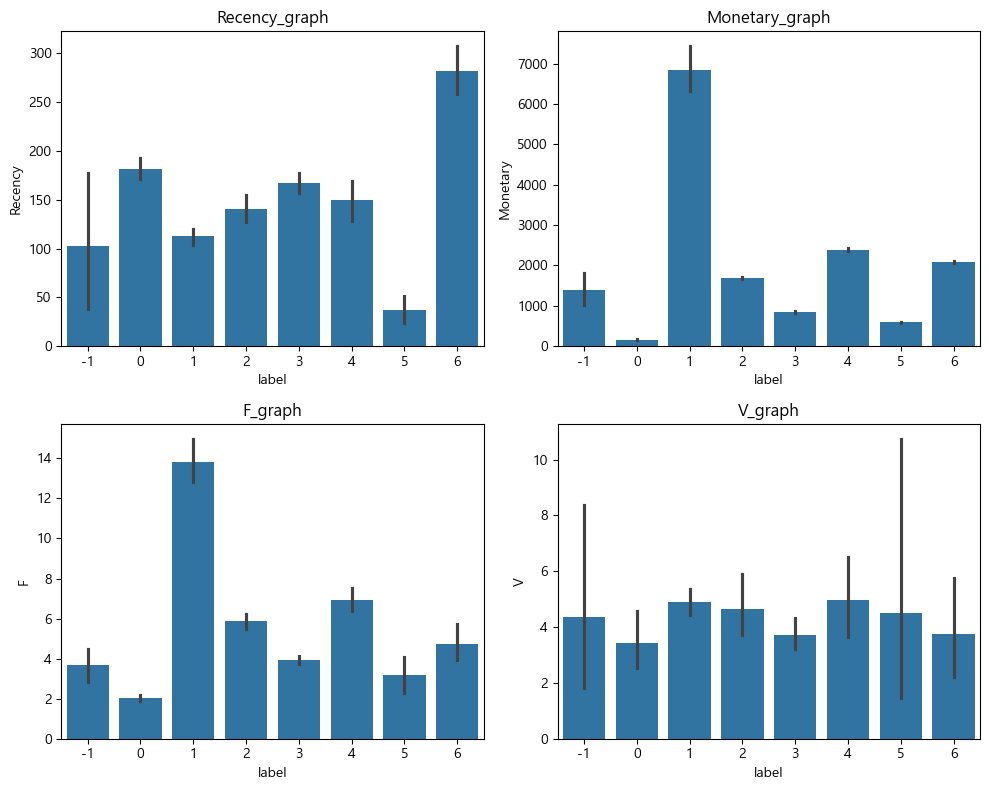

In [41]:
# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 각 그래프를 서브플롯에 그리기
for i, ax in zip(['Recency','Monetary','F','V'], axs.flatten()):
    sns.barplot(data=data, x='label', y=i, ax=ax)
    ax.set_title(f'{i}_graph')

# 서브플롯 간의 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [42]:
data['label'].value_counts()

label
 1    549
 3    331
 0    266
 2    202
 4     80
 6     16
-1     13
 5     11
Name: count, dtype: int64

In [43]:
# 클래스 내 개수가 많은 것들만 우선 보기
many = data[~data['label'].isin([-1, 5, 6])]
many

,Recency,Monetary,F,V,label
고객ID,,,,,
USER_0000,107,30.99,2,1.500000,0
USER_0001,59,13834.90,16,4.192903,1
USER_0002,73,1442.12,11,13.911765,2
USER_0003,17,1360.07,3,1.235294,2
USER_0004,107,1442.47,4,1.555556,2
...,...,...,...,...,...
USER_1463,270,544.34,4,6.571429,3
USER_1464,87,2363.05,11,3.041958,4
USER_1465,194,101.56,3,1.142857,0


In [44]:
many['label'].value_counts()

label
1    549
3    331
0    266
2    202
4     80
Name: count, dtype: int64

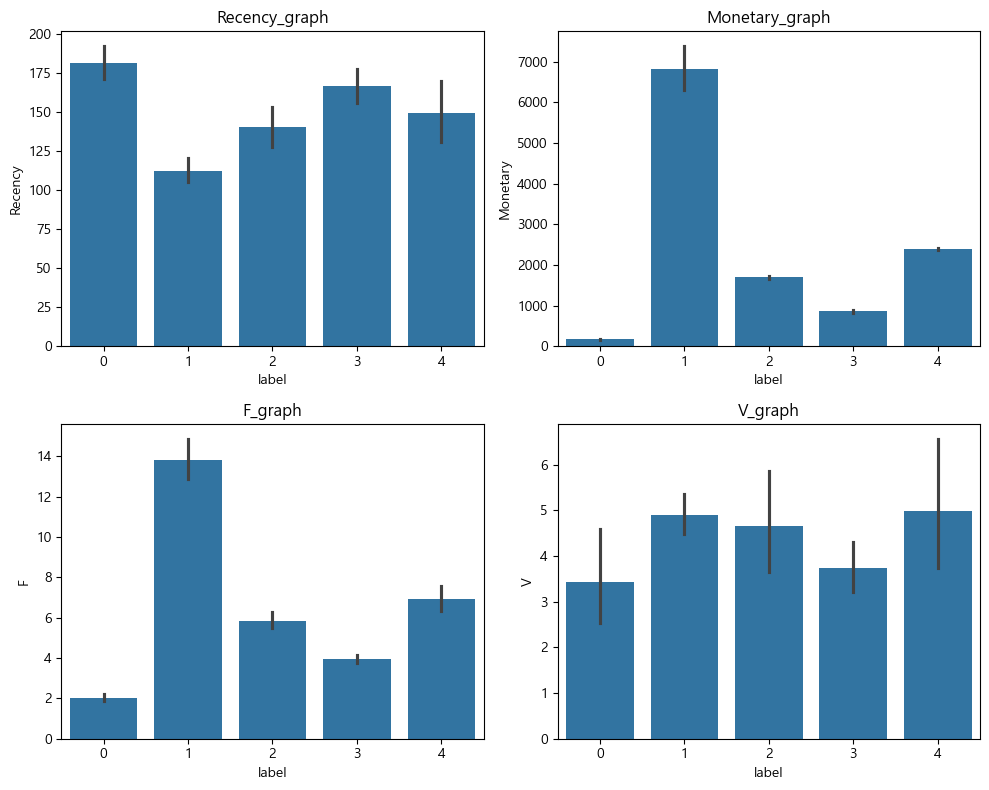

In [45]:
# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 각 그래프를 서브플롯에 그리기
for i, ax in zip(['Recency','Monetary','F','V'], axs.flatten()):
    sns.barplot(data=many, x='label', y=i, ax=ax)
    ax.set_title(f'{i}_graph')

# 서브플롯 간의 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

0번 그룹은 R이 가장 길고 F,M,V에서도 낮은 값을 가짐 -> 이탈 우려 고객(266명)
1번 그룹은 R도 가장 짧고 F,M,V에서도 높은 값을 가짐 -> VIP 고객(549명)
1번, 2번, 3번 그룹은 RFMV 모델에서 차례로 충성도가 높은 고객
따라서,
2번 그룹 -> 우수고객(202명)
3번 그룹 -> 일반고객(331명)
4번 그룹 -> 더 우수고객 (2번과 비슷한 양상을 보이나 R을 제외한 FMV에서 우수, 80명)

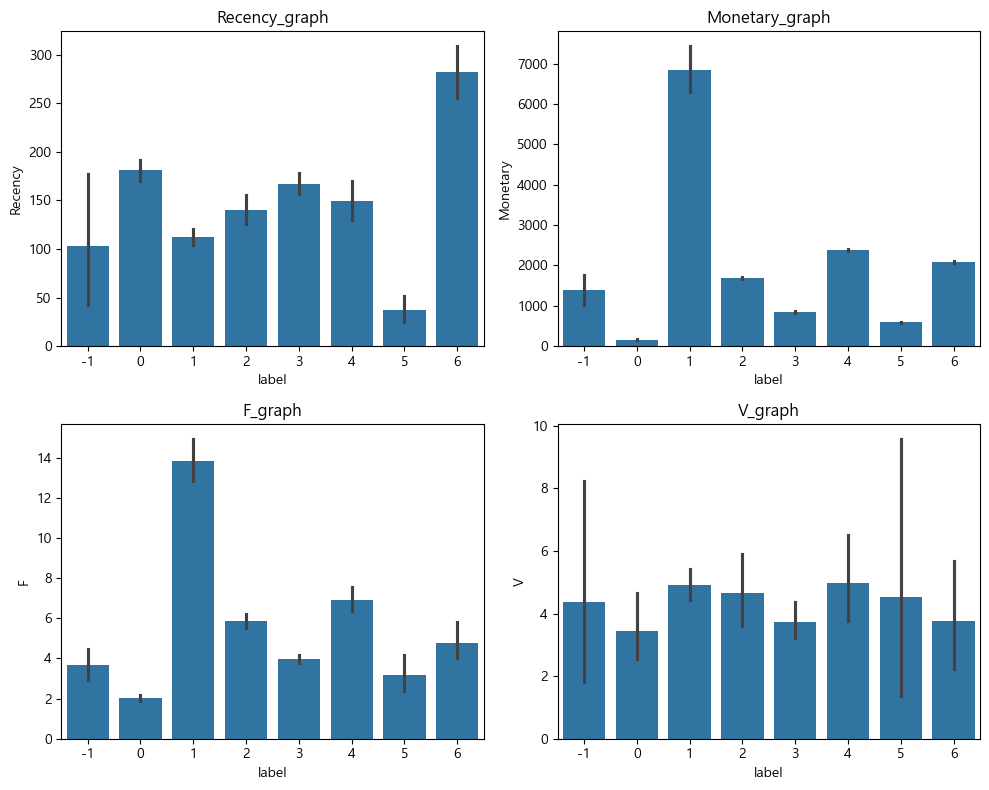

In [46]:
# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 각 그래프를 서브플롯에 그리기
for i, ax in zip(['Recency','Monetary','F','V'], axs.flatten()):
    sns.barplot(data=data, x='label', y=i, ax=ax)
    ax.set_title(f'{i}_graph')

# 서브플롯 간의 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

5번은 R이 매우 짧다. -> 최근 구매 고객(11명) -> 가입기간열 확인 필요(신규고객일수도 일지 않을까)
6번고객은 R이 매우 길다. but FMV는 우수 -> 즉, 이 6번 고객을 targeting한 마케팅 필요성 -> 겨울잠고객(16명)
-1번 군집(13명)은 이상치를 의미 -> 분석에서 따로 고려하지 않음

## 고객군 정리 

0번 그룹은 R이 가장 길고 F,M,V에서도 낮은 값을 가짐 -> 이탈 우려 고객(266명)

1번 그룹은 R도 가장 짧고 F,M,V에서도 높은 값을 가짐 -> VIP 고객(549명)

1번, 2번, 3번 그룹은 RFMV 모델에서 차례로 충성도가 높은 고객

따라서,
2번 그룹 -> 우수고객(202명)
3번 그룹 -> 일반고객(331명)
4번 그룹 -> 더 우수고객 (2번과 비슷한 양상을 보이나 R을 제외한 FMV에서 우수, 80명)

5번은 R이 매우 짧다. -> 최근 구매 고객(11명) -> 가입기간열 확인 필요(신규고객일수도 일지 않을까->그럼 입문고객으로 정의)

6번고객은 R이 매우 길다. but FMV는 우수 -> 즉, 이 6번 고객을 targeting한 마케팅 필요성 -> 겨울잠고객(16명)

고려사항
* 2번과 4번은 합쳐도 될 듯
* -1번(이상치)은 총 13명
* 특히 2/3/4번 그룹의 인원들을 1번 그룹처럼 만드는게 중요함. 소수 고객군에선 그나마 6번 그룹

In [47]:
data

,Recency,Monetary,F,V,label
고객ID,,,,,
USER_0000,107,30.99,2,1.500000,0
USER_0001,59,13834.90,16,4.192903,1
USER_0002,73,1442.12,11,13.911765,2
USER_0003,17,1360.07,3,1.235294,2
USER_0004,107,1442.47,4,1.555556,2
...,...,...,...,...,...
USER_1463,270,544.34,4,6.571429,3
USER_1464,87,2363.05,11,3.041958,4
USER_1465,194,101.56,3,1.142857,0


In [48]:
col = ['거래ID', '가격']
df.drop(col, axis=1, inplace=True)
df

,고객ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,물건가격
0,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,153.71
1,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,153.71
2,USER_1358,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,2.05
3,USER_1358,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,87.65
4,USER_1358,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,121.30
52920,USER_0504,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,48.92
52921,USER_0504,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,151.88
52922,USER_0562,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,402.60


In [49]:
df_0 = df.merge(data, on='고객ID')
df_0

,고객ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,물건가격,Recency,Monetary,F,V,label
0,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,153.71,339,34551.40,54,3.758966,1
1,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,153.71,339,34551.40,54,3.758966,1
2,USER_1358,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,2.05,339,34551.40,54,3.758966,1
3,USER_1358,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,87.65,339,34551.40,54,3.758966,1
4,USER_1358,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,16.50,339,34551.40,54,3.758966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,121.30,0,1108.99,3,1.375000,3
52920,USER_0504,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,48.92,0,1108.99,3,1.375000,3
52921,USER_0504,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,151.88,0,1108.99,3,1.375000,3
52922,USER_0562,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,402.60,0,724.68,2,4.500000,3


In [50]:
customer = cust.merge(data, on='고객ID')
customer

,고객ID,성별,고객지역,가입기간,Recency,Monetary,F,V,label
0,USER_1358,남,Chicago,12,339,34551.40,54,3.758966,1
1,USER_0190,남,California,43,13,3048.79,11,3.493967,1
2,USER_0066,남,Chicago,33,151,2361.48,8,3.686364,4
3,USER_0345,여,California,30,364,1.24,1,1.000000,0
4,USER_0683,남,California,49,123,1043.72,6,2.500000,3
...,...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,0,506.88,5,2.833333,3
1464,USER_0167,여,Chicago,48,0,3002.01,4,1.842105,1
1465,USER_0845,남,New Jersey,19,0,735.29,3,2.000000,3
1466,USER_0504,여,New York,45,0,1108.99,3,1.375000,3


## -1번

### customer별 정보 확인

In [51]:
grouped_data = customer.groupby('label')

for i in range(-1, 7):
    if i == -1:
        group_name = 'm1'
    else:
        group_name = i
    # label이 i인 그룹 데이터프레임 받기
    group = grouped_data.get_group(i)
    globals()[f"group_{group_name}"] = group.copy()

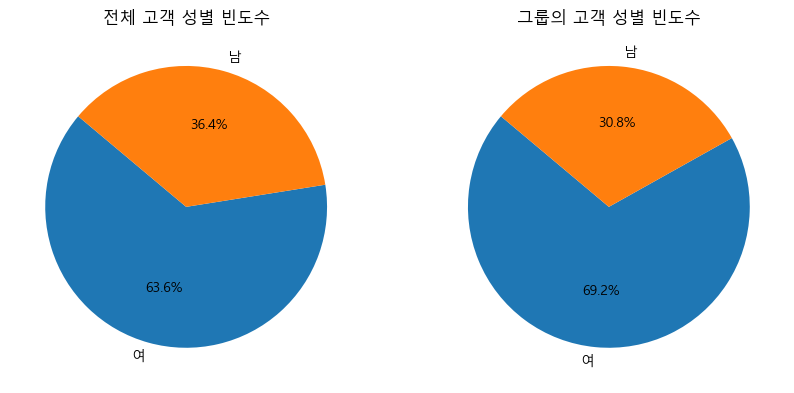

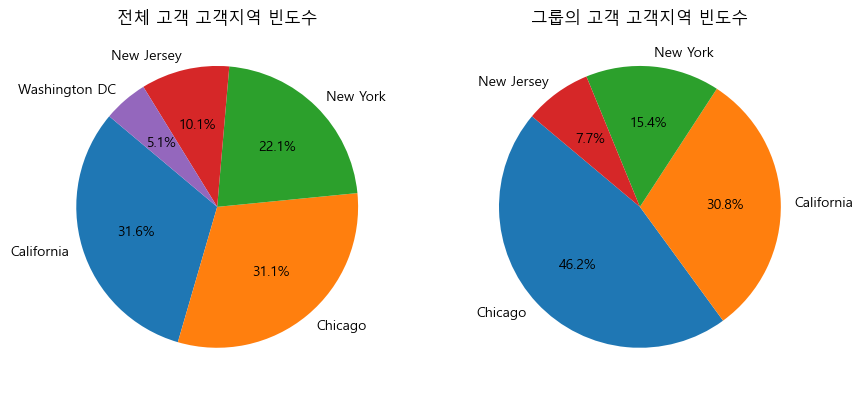

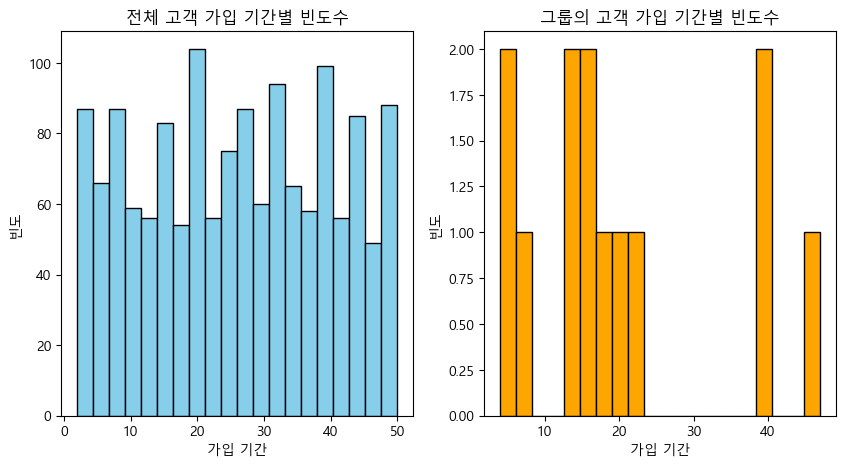

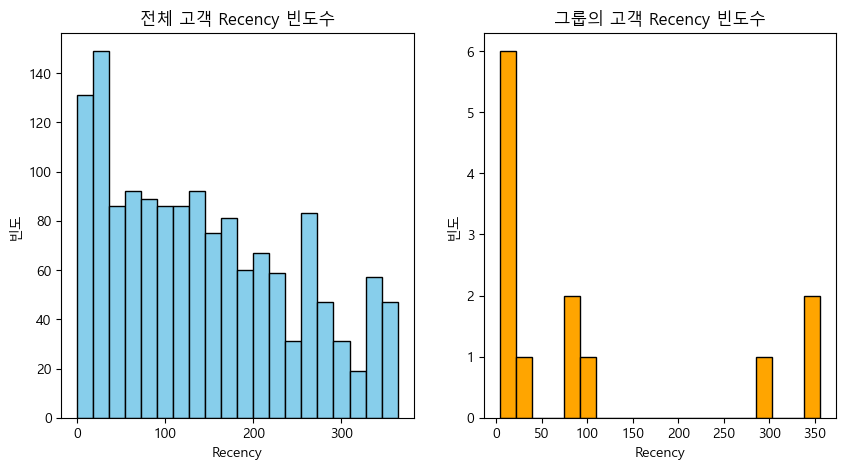

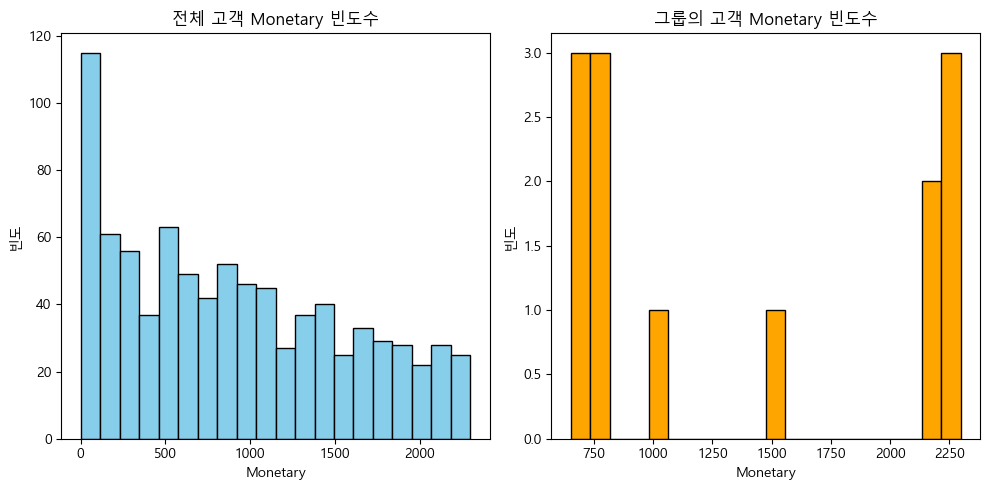

           고객ID 성별        고객지역  가입기간  Recency  Monetary  F          V  label
56    USER_0466  여     Chicago    39      356    727.15  3   2.444444     -1
156   USER_0941  여    New York    18      340    732.28  5   2.500000     -1
212   USER_0719  남    New York    40       27   2195.78  5   1.416667     -1
384   USER_1039  여  California    15      290    652.82  3   3.000000     -1
716   USER_1207  남     Chicago    16        4   2222.37  4   1.892857     -1
1105  USER_0258  여     Chicago    14       92    759.89  3   1.153846     -1
1209  USER_0086  남     Chicago    14       90    765.99  1   1.000000     -1
1240  USER_1441  여  California    47       79    752.73  3   1.266667     -1
1398  USER_0522  여  New Jersey     4       20   1516.02  2  26.500000     -1
1440  USER_0240  여     Chicago     4       11   2197.99  6   3.730769     -1
1445  USER_0015  남  California     8       10   2297.30  6   2.576923     -1
1448  USER_1269  여  California    20        9   1011.91  3   1.050000     -1

In [105]:
def customer_information(df):
    cust_count = customer['성별'].value_counts()
    group_count = df['성별'].value_counts()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.pie(cust_count, labels=cust_count.index, autopct='%1.1f%%', startangle=140)
    plt.title('전체 고객 성별 빈도수')

    plt.subplot(1, 2, 2)
    plt.pie(group_count, labels=group_count.index, autopct='%1.1f%%', startangle=140)
    plt.title('그룹의 고객 성별 빈도수')

    cust_count = customer['고객지역'].value_counts()
    group_count = df['고객지역'].value_counts()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.pie(cust_count, labels=cust_count.index, autopct='%1.1f%%', startangle=140)
    plt.title('전체 고객 고객지역 빈도수')

    plt.subplot(1, 2, 2)
    plt.pie(group_count, labels=group_count.index, autopct='%1.1f%%', startangle=140)
    plt.title('그룹의 고객 고객지역 빈도수')

    # 전체 고객 가입 기간 히스토그램
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(customer['가입기간'], bins=20, color='skyblue', edgecolor='black')
    plt.title('전체 고객 가입 기간별 빈도수')
    plt.xlabel('가입 기간')
    plt.ylabel('빈도')

    # 그룹의 고객 가입 기간 히스토그램
    plt.subplot(1, 2, 2)
    plt.hist(df['가입기간'], bins=20, color='orange', edgecolor='black')
    plt.title('그룹의 고객 가입 기간별 빈도수')
    plt.xlabel('가입 기간')
    plt.ylabel('빈도')

    # 전체 고객 가입 기간 히스토그램
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(customer['Recency'], bins=20, color='skyblue', edgecolor='black')
    plt.title('전체 고객 Recency 빈도수')
    plt.xlabel('Recency')
    plt.ylabel('빈도')

    # 그룹의 고객 가입 기간 히스토그램
    plt.subplot(1, 2, 2)
    plt.hist(df['Recency'], bins=20, color='orange', edgecolor='black')
    plt.title('그룹의 고객 Recency 빈도수')
    plt.xlabel('Recency')
    plt.ylabel('빈도')

    max_value = df['Monetary'].max()  # 그룹의 열 i의 최댓값
    filtered_data = customer[customer['Monetary'] <= max_value]

    # 전체 고객 가입 기간 히스토그램
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(filtered_data['Monetary'], bins=20, color='skyblue', edgecolor='black')
    plt.title('전체 고객 Monetary 빈도수')
    plt.xlabel('Monetary')
    plt.ylabel('빈도')

    # 그룹의 고객 가입 기간 히스토그램
    plt.subplot(1, 2, 2)
    plt.hist(df['Monetary'], bins=20, color='orange', edgecolor='black')
    plt.title('그룹의 고객 Monetary 빈도수')
    plt.xlabel('Monetary')
    plt.ylabel('빈도')

    plt.tight_layout()  # 그래프 간격 조정
    plt.show()

    df= pd.DataFrame(df)
    print(df)


customer_information(group_m1)

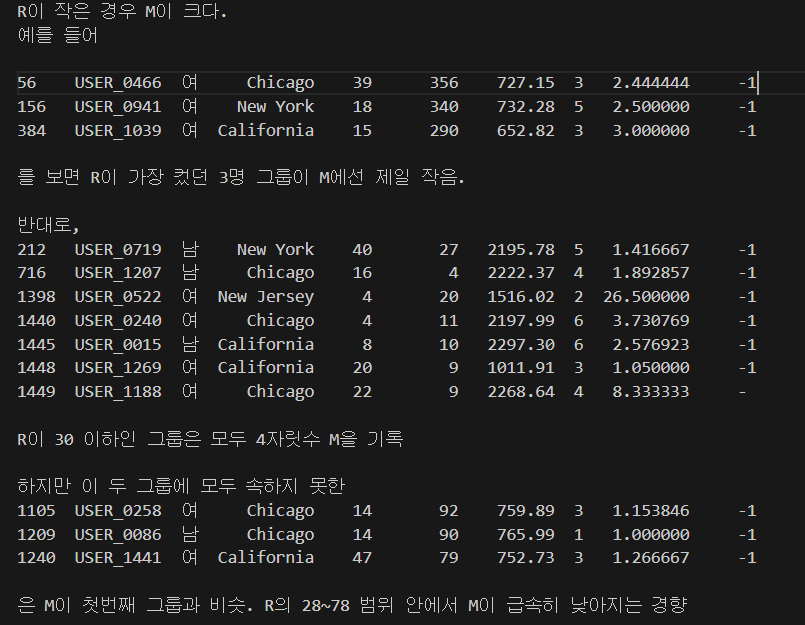

대신 그룹 3은 V가 작은 특성

In [53]:
# R에 따라 소그룹 분류
group_m1.loc[group_m1['Recency'] > 250, 'group'] = 1
group_m1.loc[group_m1['Recency'] < 30, 'group'] = 2
group_m1.loc[(group_m1['Recency'] >= 30) & (group_m1['Recency'] <= 250), 'group'] = 3

In [54]:
small_group = group_m1.loc[:,['고객ID', 'group']]
small_group

,고객ID,group
56,USER_0466,1.0
156,USER_0941,1.0
212,USER_0719,2.0
384,USER_1039,1.0
716,USER_1207,2.0
1105,USER_0258,3.0
1209,USER_0086,3.0
1240,USER_1441,3.0
1398,USER_0522,2.0
1440,USER_0240,2.0


### online파일 정보 그룹별 확인

In [77]:
online_df = online.copy()
online_df['가격'] = online_df['수량']*online_df['평균금액']
online_df

,고객ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,가격
0,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71
1,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71
2,USER_1358,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05
3,USER_1358,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65
4,USER_1358,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30
52920,USER_0504,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92
52921,USER_0504,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88
52922,USER_0562,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60


In [78]:
online_df = online_df.merge(data, on='고객ID')
online_df

,고객ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,가격,Recency,Monetary,F,V,label
0,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,339,34551.40,54,3.758966,1
1,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,339,34551.40,54,3.758966,1
2,USER_1358,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05,339,34551.40,54,3.758966,1
3,USER_1358,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65,339,34551.40,54,3.758966,1
4,USER_1358,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50,339,34551.40,54,3.758966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30,0,1108.99,3,1.375000,3
52920,USER_0504,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92,0,1108.99,3,1.375000,3
52921,USER_0504,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88,0,1108.99,3,1.375000,3
52922,USER_0562,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60,0,724.68,2,4.500000,3


In [79]:
col = ['Recency', 'Monetary','F','V']
online_df.drop(col, axis=1, inplace=True)
online_df

,고객ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,가격,label
0,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1
1,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1
2,USER_1358,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05,1
3,USER_1358,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65,1
4,USER_1358,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50,1
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30,3
52920,USER_0504,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92,3
52921,USER_0504,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88,3
52922,USER_0562,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60,3


In [82]:
grouped_data = online_df.groupby('label')

for i in range(-1, 7):
    if i == -1:
        group_name = 'm1'
    else:
        group_name = i
    # label이 i인 그룹 데이터프레임 받기
    group = grouped_data.get_group(i)
    globals()[f"group_{group_name}"] = group.copy()

In [83]:
online_categorical = online_df[['고객ID', '거래날짜', '제품ID', '수량','가격', '제품카테고리', '쿠폰상태']]
online_numerical = online_df[['고객ID', '거래날짜', '수량', '평균금액', '배송료', '가격' ]]
grouped_numerical = online_numerical.groupby(['고객ID','거래날짜'])
online_aggregated_numerical = grouped_numerical.agg({'수량': 'sum', '평균금액': 'sum', '배송료': 'mean', '가격': 'sum'})
online_aggregated_numerical

수량     평균금액        배송료        가격
고객ID      거래날짜                                         
USER_0000 2019-09-15    3    25.49  75.000000     30.99
USER_0001 2019-03-24  305  1453.69  13.982903  11216.05
          2019-11-01    6    23.16  13.425000     29.54
          2019-11-02   31  2269.31   7.118800   2589.31
USER_0002 2019-06-22   65   238.67   6.000000    777.03
...                   ...      ...        ...       ...
USER_1465 2019-04-05    9    74.65   6.500000     86.87
          2019-06-20    1    14.69   6.000000     14.69
USER_1466 2019-10-23    2   149.00   6.000000    298.00
USER_1467 2019-07-29   91  1633.84   7.594912   1921.20
          2019-10-10   64  4024.16   6.329556   4441.57

[3208 rows x 4 columns]

In [84]:
numerical = group_m1[['고객ID', '거래날짜', '수량', '평균금액', '배송료', '가격' ]]
categorical = group_m1[['고객ID', '거래날짜', '제품ID', '수량','가격', '제품카테고리', '쿠폰상태']]

grouped_numerical = numerical.groupby(['고객ID','거래날짜'])
aggregated_numerical = grouped_numerical.agg({'수량': 'sum', '평균금액': 'sum', '배송료': 'mean', '가격': 'sum'})
aggregated_numerical

수량     평균금액        배송료       가격
고객ID      거래날짜                                        
USER_0015 2019-12-21   67  1704.54  10.027692  2297.30
USER_0086 2019-10-02    5   765.99   6.000000   765.99
USER_0240 2019-12-20   97  1451.54  11.830385  2197.99
USER_0258 2019-08-25   17   634.53   6.000000   640.89
          2019-09-30    1   119.00   6.000000   119.00
USER_0466 2019-01-09   22   494.73  21.246667   727.15
USER_0522 2019-12-11  106    66.66  37.510000  1516.02
USER_0719 2019-01-31    4   303.30   6.500000   426.07
          2019-12-04   21  1054.55   8.446429  1769.71
USER_0941 2019-01-25   50   561.68   6.500000   732.28
USER_1039 2019-03-16   27   371.74   9.157778   652.82
USER_1188 2019-12-22  175  1293.86   7.844762  2268.64
USER_1207 2019-05-18   39   741.78   6.065000   975.74
          2019-12-27   11  1246.63  11.405455  1246.63
USER_1269 2019-12-21    1   151.88   6.500000   151.88
          2019-12-22   11   738.73   6.500000   860.03
USER_1441 2019-10-13   19   729.38   7.398000   752.73

In [85]:
numerical_data = aggregated_numerical.merge(small_group, on ='고객ID')
numerical_data
# R 기준 250 이상 1, 30이하 2 그 외 3 
# M 기준 1은 적고, 2는 많고 3은 적음

,고객ID,수량,평균금액,배송료,가격,group
0,USER_0015,67,1704.54,10.027692,2297.30,2.0
1,USER_0086,5,765.99,6.000000,765.99,3.0
2,USER_0240,97,1451.54,11.830385,2197.99,2.0
3,USER_0258,17,634.53,6.000000,640.89,3.0
4,USER_0258,1,119.00,6.000000,119.00,3.0
5,USER_0466,22,494.73,21.246667,727.15,1.0
6,USER_0522,106,66.66,37.510000,1516.02,2.0
7,USER_0719,4,303.30,6.500000,426.07,2.0
8,USER_0719,21,1054.55,8.446429,1769.71,2.0
9,USER_0941,50,561.68,6.500000,732.28,1.0


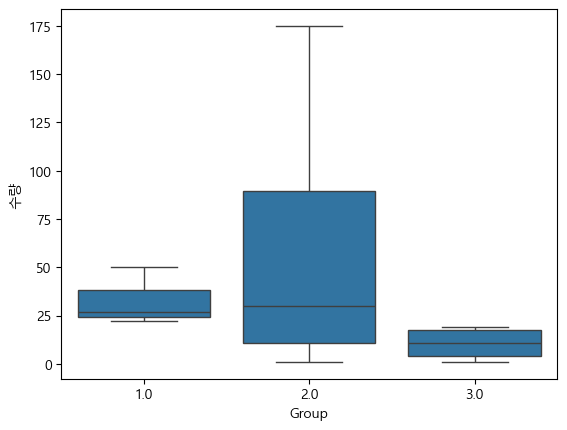

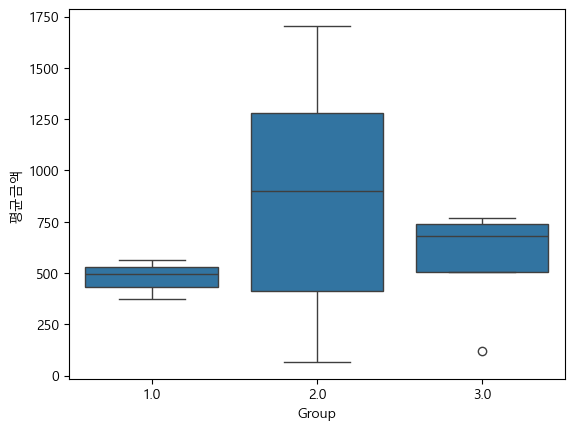

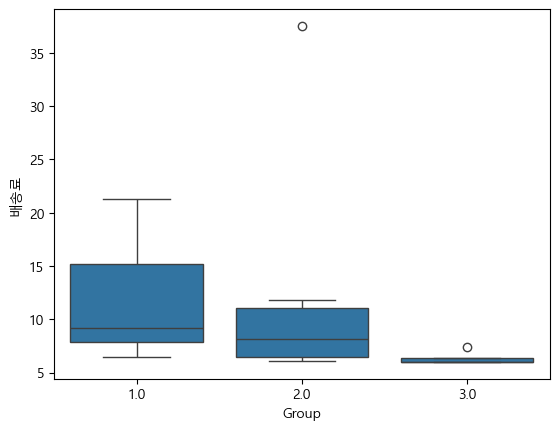

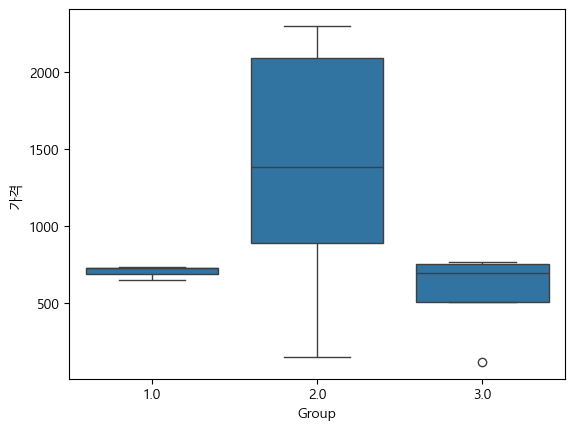

In [86]:
# R 기준 250 이상 1(3명), 30이하 2(7명) 그 외 3(3명)
# M 기준 1은 적고, 2는 많고 3은 적음
for i in numerical_data.columns[1:5]:  
    sns.boxplot(data=numerical_data, x='group', y=i)
    plt.xlabel('Group')
    plt.ylabel(i)
    plt.show()
# 큰 차이는 모르겠음.. 다만, M은 확실

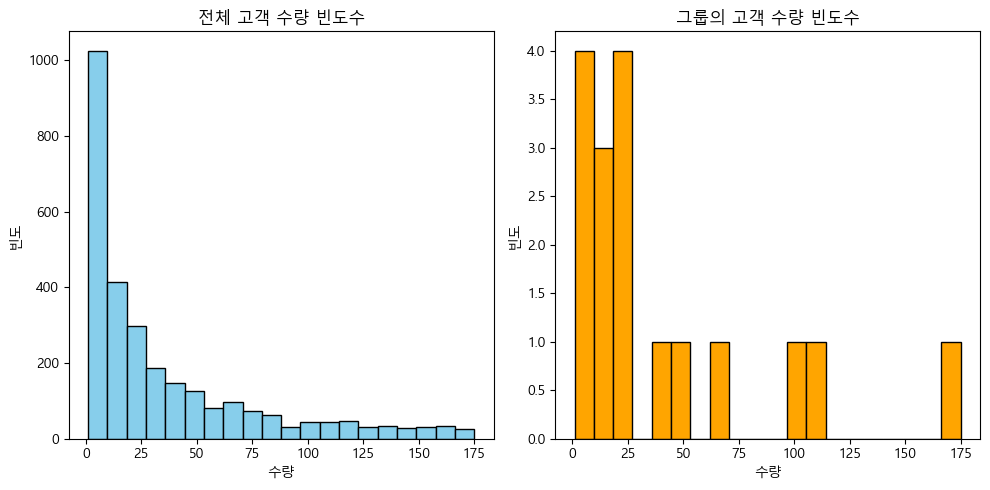

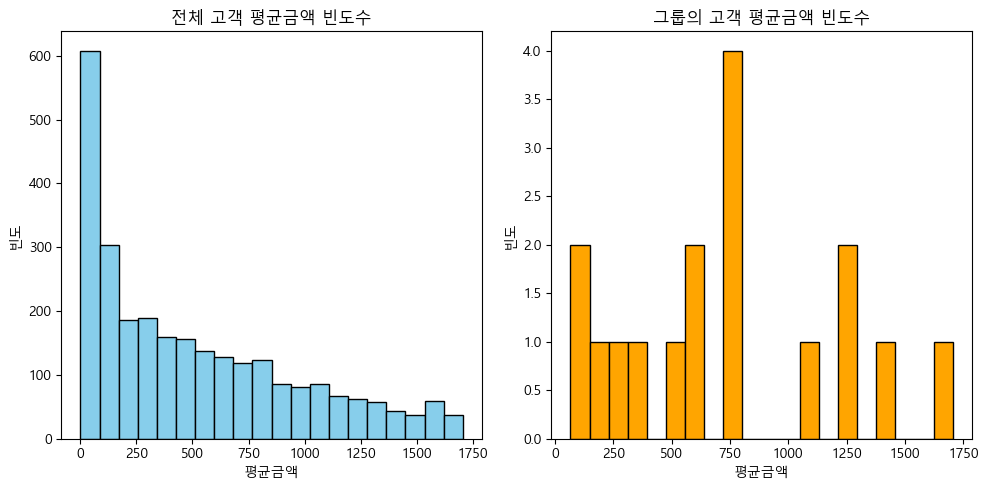

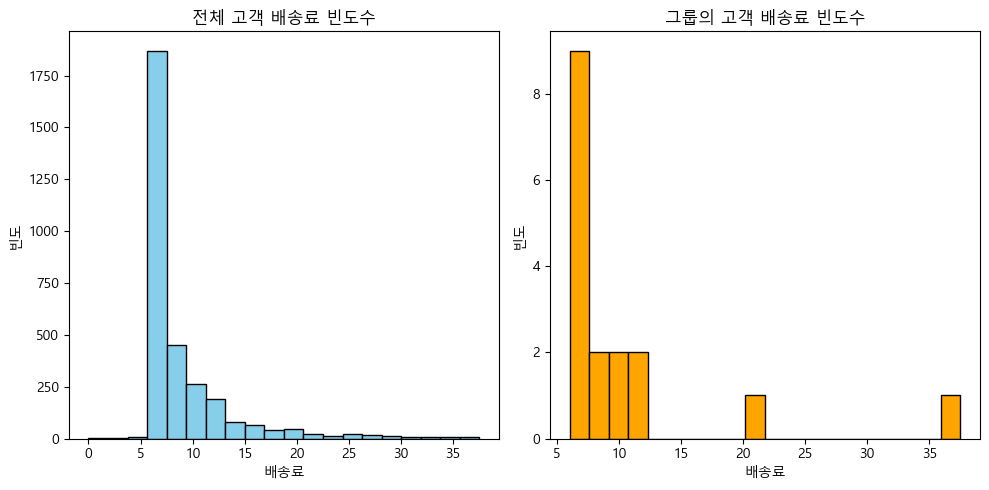

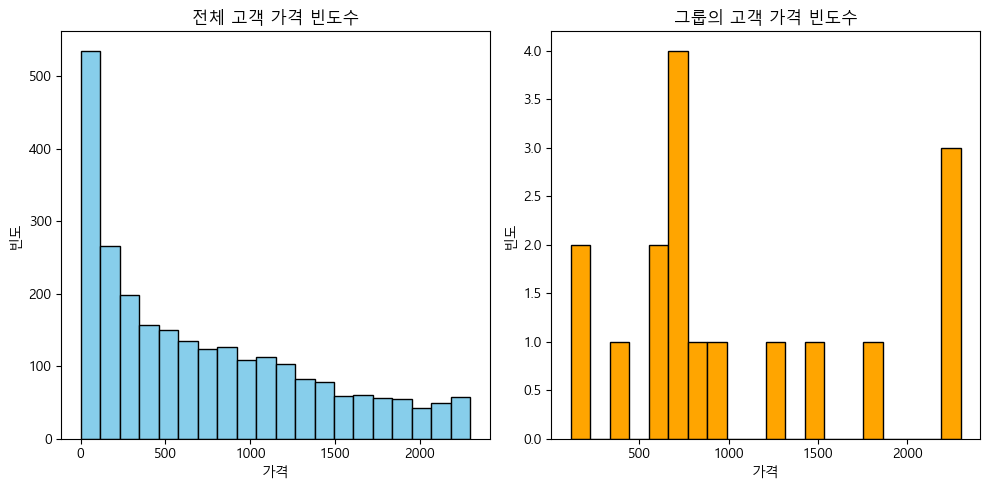

In [87]:
def online_numerical_graph(df_all, group):
    for i in group.columns:
     # 전체 고객 가입 기간 히스토그램
        max_value = group[i].max()  # 그룹의 열 i의 최댓값
        filtered_data = df_all[df_all[i] <= max_value]
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.hist(filtered_data[i], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'전체 고객 {i} 빈도수')
        plt.xlabel(f'{i}')
        plt.ylabel('빈도')

        # 그룹의 고객 가입 기간 히스토그램
        plt.subplot(1, 2, 2)
        plt.hist(group[i], bins=20, color='orange', edgecolor='black')
        plt.title(f'그룹의 고객 {i} 빈도수')
        plt.xlabel(f'{i}')
        plt.ylabel('빈도')

        plt.tight_layout()  # 그래프 간격 조정
        plt.show()

gg = numerical_data.iloc[:,1:5]
online_numerical_graph(online_aggregated_numerical,gg)

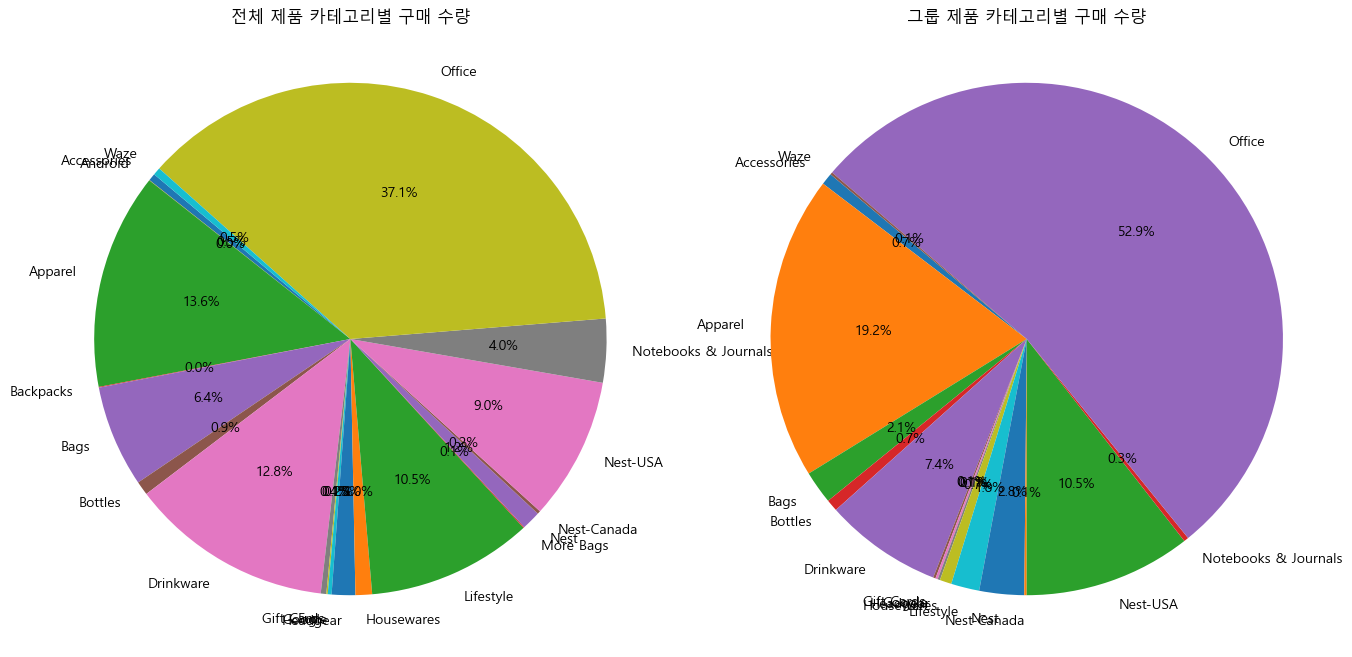

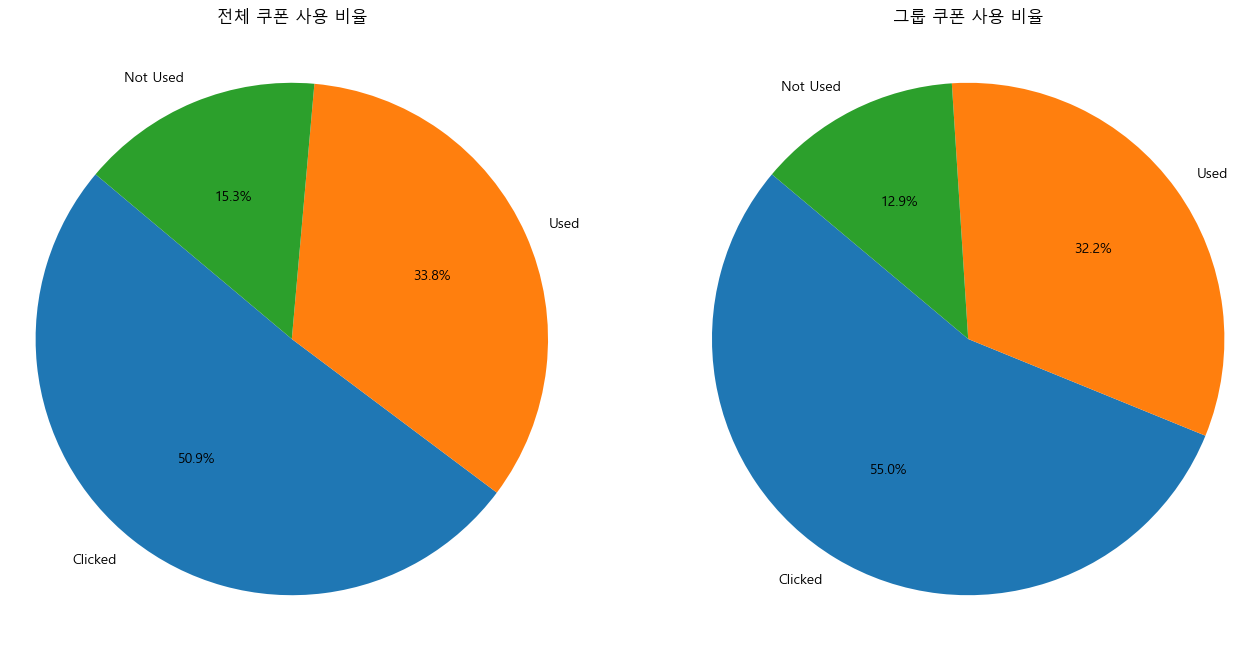

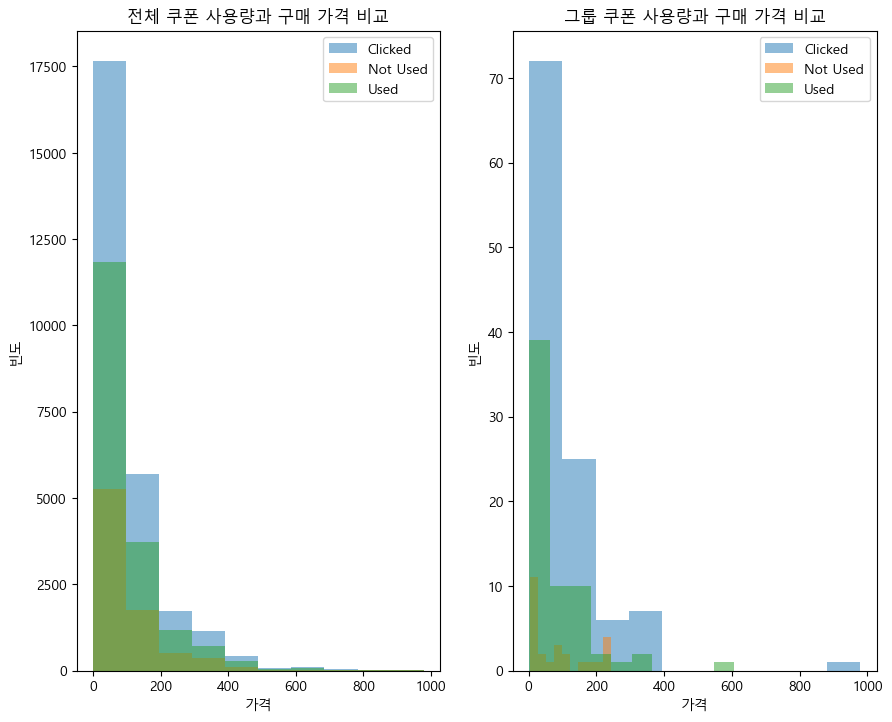

            고객ID        거래날짜          제품ID  수량      가격     제품카테고리     쿠폰상태
3859   USER_0466  2019-01-09  Product_0981   1  153.71   Nest-USA     Used
3860   USER_0466  2019-01-09  Product_0983   1  122.77   Nest-USA     Used
3861   USER_0466  2019-01-09  Product_1022   1   17.53    Apparel  Clicked
3862   USER_0466  2019-01-09  Product_1137   1   11.34    Apparel     Used
3863   USER_0466  2019-01-09  Product_0952   2   22.68     Office  Clicked
...          ...         ...           ...  ..     ...        ...      ...
52590  USER_1188  2019-12-22  Product_0981   2  303.76   Nest-USA  Clicked
52591  USER_1188  2019-12-22  Product_0490   1    4.33    Apparel     Used
52592  USER_1188  2019-12-22  Product_0582   1    4.84    Apparel     Used
52593  USER_1188  2019-12-22  Product_0195   1    4.07  Lifestyle     Used
52594  USER_1188  2019-12-22  Product_1018   1    3.05       Waze  Clicked

[202 rows x 7 columns]


In [88]:
def online_categorical_graph(df_all, group):
    plt.figure(figsize=(16, 8)) 
    
    category_quantity = df_all.groupby('제품카테고리')['수량'].sum()

    plt.subplot(1, 2, 1)
    plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('전체 제품 카테고리별 구매 수량')
    
    
    category_quantity = group.groupby('제품카테고리')['수량'].sum()

    plt.subplot(1, 2, 2)
    plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title('그룹 제품 카테고리별 구매 수량')
    
    plt.figure(figsize=(16, 8)) 
    
    category_quantity = df_all['쿠폰상태'].value_counts()

    plt.subplot(1, 2, 1)
    plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('전체 쿠폰 사용 비율')
    
    
    category_quantity = group['쿠폰상태'].value_counts()

    plt.subplot(1, 2, 2)
    plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title('그룹 쿠폰 사용 비율')
    
    max_group_price = group['가격'].max()

    plt.figure(figsize=(16, 8))
    # 전체 쿠폰 사용량과 구매 가격 비교
    plt.subplot(1, 2, 1)
    for coupon_status, group_data in df_all.groupby('쿠폰상태'):
        plt.hist(group_data['가격'], alpha=0.5, label=coupon_status,  range=(0, max_group_price))
    plt.title('전체 쿠폰 사용량과 구매 가격 비교')
    plt.xlabel('가격')
    plt.ylabel('빈도')
    plt.legend()

    # 그룹 쿠폰 사용량과 구매 가격 비교
    plt.subplot(1, 2, 2)
    for coupon_status, group_data in group.groupby('쿠폰상태'):
        plt.hist(group_data['가격'], alpha=0.5, label=coupon_status)
    plt.title('그룹 쿠폰 사용량과 구매 가격 비교')
    plt.xlabel('가격')
    plt.ylabel('빈도')
    plt.legend()

    plt.subplots_adjust(left=0.1, right=0.6, top=0.9, bottom=0.1)
    plt.show()

    print(group)

online_categorical_graph(online_categorical, categorical)

In [89]:
categorical[categorical['수량'] > 10] 

,고객ID,거래날짜,제품ID,수량,가격,제품카테고리,쿠폰상태
32919,USER_1207,2019-05-18,Product_0969,25,119.75,Office,Used
51558,USER_0522,2019-12-11,Product_0962,76,978.12,Office,Clicked
52428,USER_0240,2019-12-20,Product_0914,20,16.20,Office,Clicked
52429,USER_0240,2019-12-20,Product_0962,31,391.22,Office,Clicked
52535,USER_0015,2019-12-21,Product_0922,15,134.40,Apparel,Clicked
52581,USER_1188,2019-12-22,Product_0904,51,121.89,Office,Used
52582,USER_1188,2019-12-22,Product_0942,51,102.00,Office,Clicked
52583,USER_1188,2019-12-22,Product_0969,51,244.29,Office,Clicked


카테고리에서 office, notebook 등의 비중이 높은 것으로 보아 직장인 내지 회사의 비율이 높아 보임 하지만 M이 낮은 것으로 보아 직장인의 비중이 높아보임.
특히, 가격이 높아질수록 쿠폰을 사용하려했던 비중이 높아(위의 데이터 프레임만 봐도 Not Used가 없음), 신입 직장인 느낌..! 왜냐하면 일반적으로 직장을 오래 다니는 사람이 오피스를 많이 사지는 않을거니깐? 특히 저 User_1188의 비중이 매우 큰 것을 알 수 있음.

In [92]:
group_m1

,고객ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,가격,label
3859,USER_0466,2019-01-09,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,-1
3860,USER_0466,2019-01-09,Product_0983,Nest-USA,1,122.77,6.5,Used,122.77,-1
3861,USER_0466,2019-01-09,Product_1022,Apparel,1,17.53,6.5,Clicked,17.53,-1
3862,USER_0466,2019-01-09,Product_1137,Apparel,1,11.34,6.5,Used,11.34,-1
3863,USER_0466,2019-01-09,Product_0952,Office,2,11.34,6.5,Clicked,22.68,-1
...,...,...,...,...,...,...,...,...,...,...
52590,USER_1188,2019-12-22,Product_0981,Nest-USA,2,151.88,6.5,Clicked,303.76,-1
52591,USER_1188,2019-12-22,Product_0490,Apparel,1,4.33,6.0,Used,4.33,-1
52592,USER_1188,2019-12-22,Product_0582,Apparel,1,4.84,6.0,Used,4.84,-1
52593,USER_1188,2019-12-22,Product_0195,Lifestyle,1,4.07,6.0,Used,4.07,-1


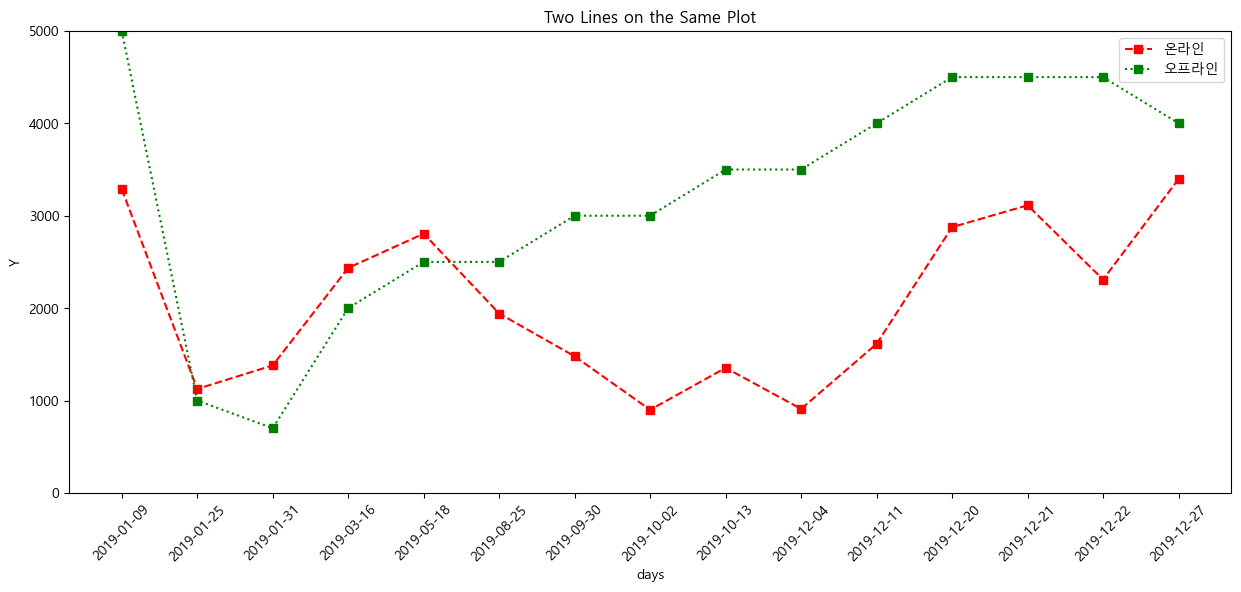

In [98]:
tmp=group_m1.groupby('거래날짜').count().reset_index()
tmp.rename(columns={'거래날짜': '날짜'}, inplace=True)
tmp=tmp.merge(marketing, on='날짜')
plt.figure(figsize=(15, 6))

plt.plot(tmp['날짜'], tmp['온라인비용'], label='온라인', color='red', linestyle='--', marker='s')

plt.plot(tmp['날짜'], tmp['오프라인비용'], label='오프라인', color='green', linestyle=':', marker='s')

plt.legend()
plt.title('Two Lines on the Same Plot')
plt.xlabel('days')
plt.ylabel('Y')
plt.ylim(0, 5000)
plt.xticks(rotation=45)
plt.show()

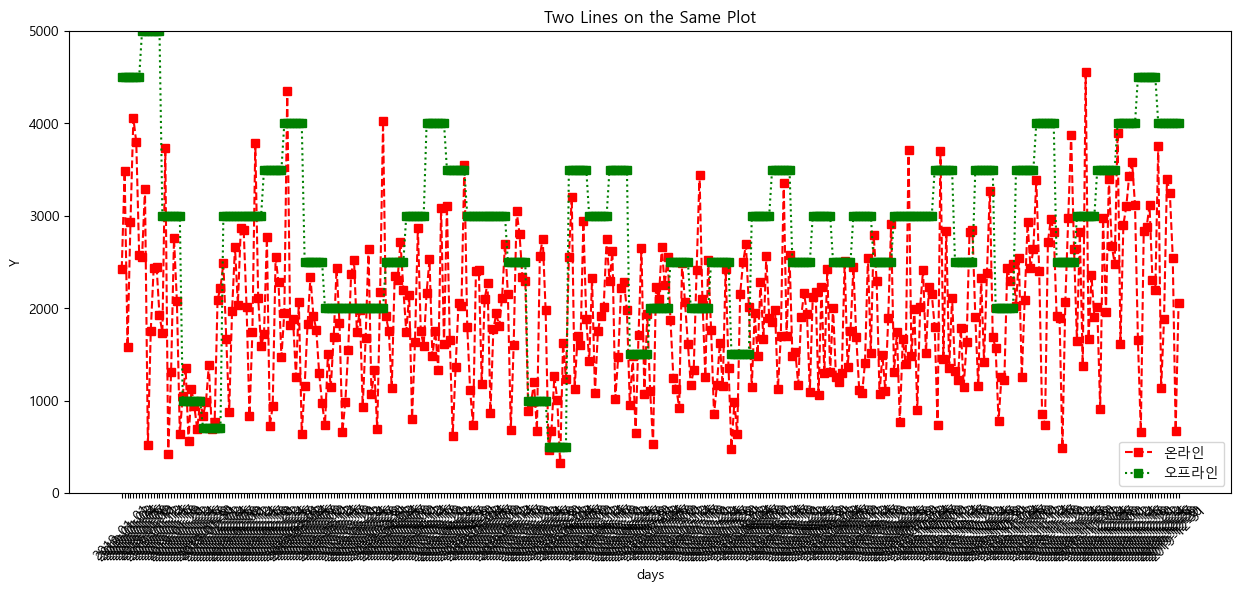

In [99]:
plt.figure(figsize=(15, 6))
plt.plot(marketing['날짜'], marketing['온라인비용'], label='온라인', color='red', linestyle='--', marker='s')

plt.plot(marketing['날짜'], marketing['오프라인비용'], label='오프라인', color='green', linestyle=':', marker='s')

plt.legend()
plt.title('Two Lines on the Same Plot')
plt.xlabel('days')
plt.ylabel('Y')
plt.ylim(0, 5000)
plt.xticks(rotation=45)
plt.show()

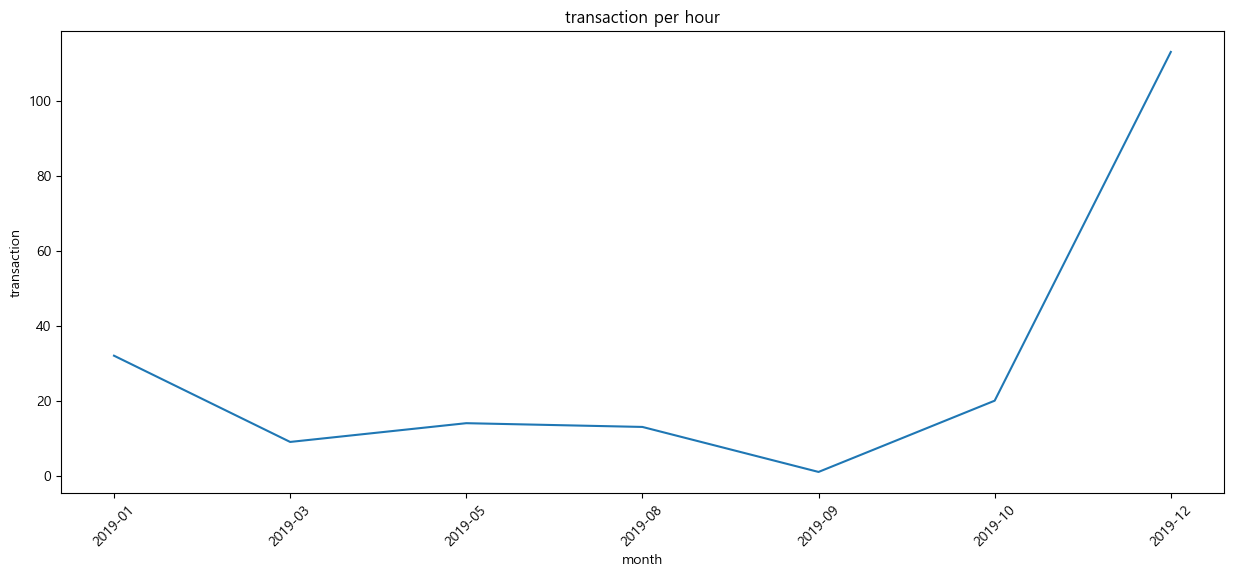

In [100]:
counts_by_month = group_m1.assign(Month=pd.to_datetime(group_m1['거래날짜']).dt.to_period('M'))['Month'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x=counts_by_month.index.astype(str), y=counts_by_month.values)
plt.title('transaction per hour')
plt.xlabel('month')
plt.ylabel('transaction')
plt.xticks(rotation=45)
plt.show()

# 평균적인 할인율이 연말에 높음 -> 할인에 영향을 많이 받는 집단 -> 돈이 많지 않은 고객군(FMV가 적은 이유)

얘네도 그냥 연말 고객들이네
연말에 회사 합격한 기념으로 사무용품 쇼핑하는 고객st 같음.

## 0번 고객군

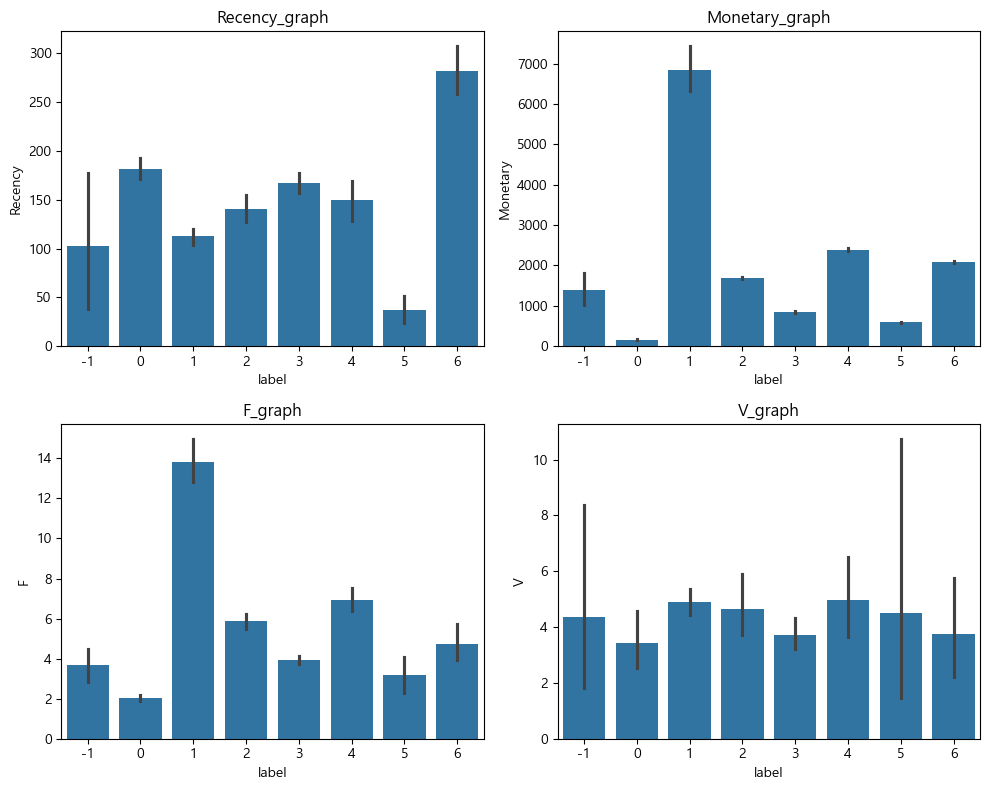

0번 고객군은 R은 높은데 FMV는 모두 낮은 고객군 즉, 쫌 더 노력해야하는 고객군

### customer 분석

In [101]:
grouped_data = customer.groupby('label')

for i in range(-1, 7):
    if i == -1:
        group_name = 'm1'
    else:
        group_name = i
    # label이 i인 그룹 데이터프레임 받기
    group = grouped_data.get_group(i)
    globals()[f"group_{group_name}"] = group.copy()

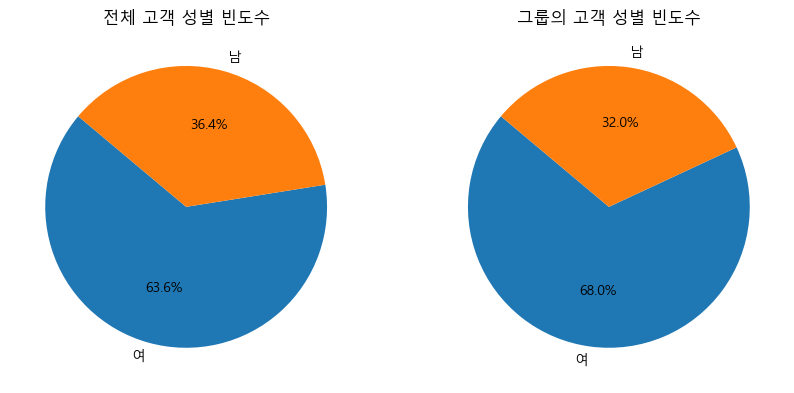

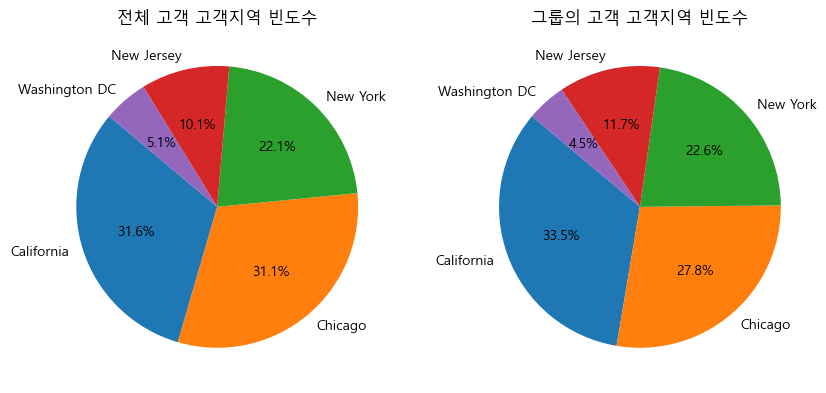

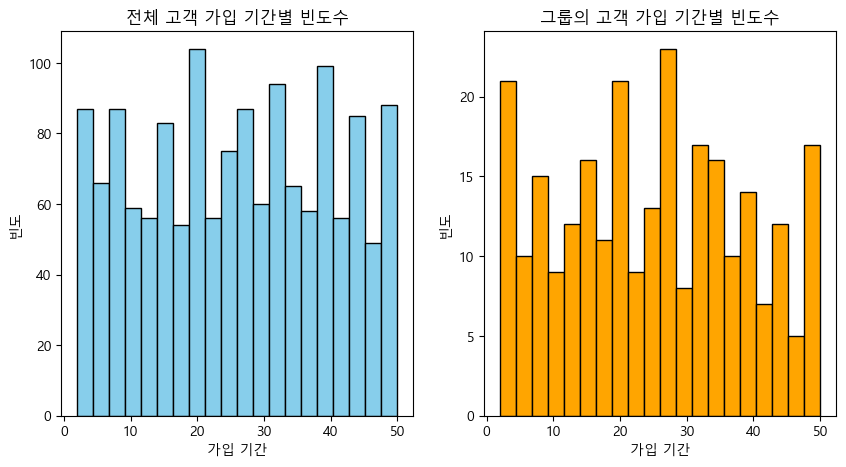

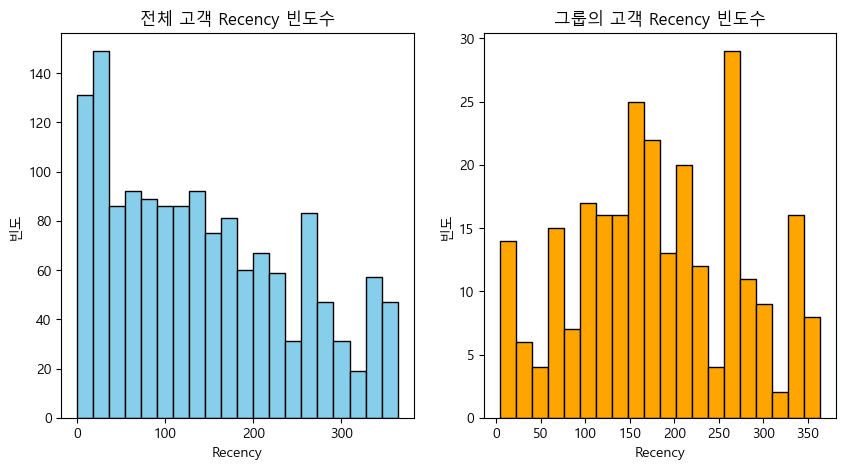

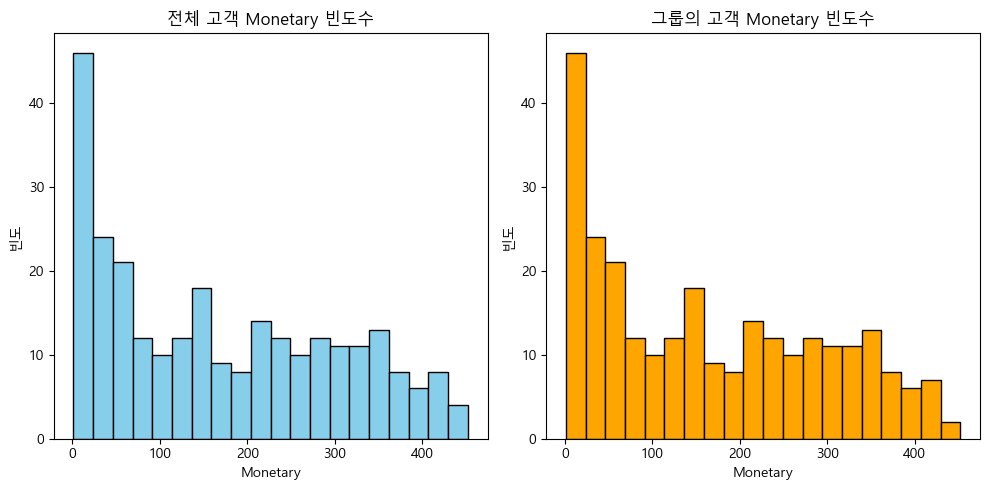

           고객ID 성별           고객지역  가입기간  Recency  Monetary  F      V  label
3     USER_0345  여     California    30      364      1.24  1  1.000      0
19    USER_0344  여        Chicago    21      362    153.71  1  1.000      0
22    USER_1383  남     New Jersey    26      177    206.67  3  1.000      0
26    USER_0130  여  Washington DC    26      362    140.30  1  1.000      0
28    USER_0412  여     California    14      158    115.21  4  1.375      0
...         ... ..            ...   ...      ...       ... ..    ...    ...
1437  USER_0873  여     California    39       12     22.41  1  1.000      0
1446  USER_1385  남     California     4       10    273.18  1  1.000      0
1455  USER_1206  여        Chicago    14        7    121.30  1  1.000      0
1457  USER_0705  여     New Jersey    41        5    141.67  1  1.000      0
1460  USER_0629  여     New Jersey    14        4    163.08  1  1.000      0

[266 rows x 9 columns]


In [106]:
customer_information(group_0)
# 여성 비율이 높다. R도 높은 경향

### online

In [108]:
online_df = online.copy()
online_df['가격'] = online_df['수량']*online_df['평균금액']
online_df = online_df.merge(data, on='고객ID')
col = ['Recency', 'Monetary','F','V']
online_df.drop(col, axis=1, inplace=True)
online_df

,고객ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,가격,label
0,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1
1,USER_1358,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1
2,USER_1358,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05,1
3,USER_1358,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65,1
4,USER_1358,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50,1
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30,3
52920,USER_0504,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92,3
52921,USER_0504,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88,3
52922,USER_0562,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60,3


In [109]:
grouped_data = online_df.groupby('label')

for i in range(-1, 7):
    if i == -1:
        group_name = 'm1'
    else:
        group_name = i
    # label이 i인 그룹 데이터프레임 받기
    group = grouped_data.get_group(i)
    globals()[f"group_{group_name}"] = group.copy()

In [116]:
online_categorical = online_df[['고객ID', '거래날짜', '제품ID', '수량','가격', '제품카테고리', '쿠폰상태']]
online_numerical = online_df[['고객ID', '거래날짜', '수량', '평균금액', '배송료', '가격' ]]
grouped_numerical = online_numerical.groupby(['고객ID','거래날짜'])
online_aggregated_numerical = grouped_numerical.agg({'수량': 'sum', '평균금액': 'sum', '배송료': 'mean', '가격': 'sum'})
numerical = group_0[['고객ID', '거래날짜', '수량', '평균금액', '배송료', '가격' ]]
categorical = group_0[['고객ID', '거래날짜', '제품ID', '수량','가격', '제품카테고리', '쿠폰상태']]
grouped_numerical = numerical.groupby(['고객ID','거래날짜'])
aggregated_numerical = grouped_numerical.agg({'수량': 'sum', '평균금액': 'sum', '배송료': 'mean', '가격': 'sum'})
aggregated_numerical

수량    평균금액    배송료      가격
고객ID      거래날짜                                 
USER_0000 2019-09-15   3   25.49  75.00   30.99
USER_0027 2019-05-23  15    6.39   6.00   31.52
USER_0037 2019-12-05   2  252.79   6.50  252.79
USER_0044 2019-04-12   3  133.54   6.00  133.54
          2019-06-13   2  119.00   6.00  238.00
...                   ..     ...    ...     ...
USER_1458 2019-09-14  50    1.99   6.00   99.50
USER_1462 2019-07-05   4   49.56   6.25   49.56
USER_1465 2019-04-05   9   74.65   6.50   86.87
          2019-06-20   1   14.69   6.00   14.69
USER_1466 2019-10-23   2  149.00   6.00  298.00

[329 rows x 4 columns]

In [118]:
numerical

,고객ID,거래날짜,수량,평균금액,배송료,가격
383,USER_0345,2019-01-01,1,1.24,6.50,1.24
1656,USER_0344,2019-01-03,1,153.71,6.50,153.71
1808,USER_1383,2019-01-03,1,11.34,35.30,11.34
1809,USER_1383,2019-01-03,1,153.71,28.78,153.71
1810,USER_1383,2019-01-30,1,10.31,6.50,10.31
...,...,...,...,...,...,...
52759,USER_0705,2019-12-26,1,17.93,6.50,17.93
52760,USER_0705,2019-12-26,1,121.30,6.50,121.30
52761,USER_0705,2019-12-26,1,2.44,6.50,2.44
52817,USER_0629,2019-12-27,1,151.88,6.50,151.88


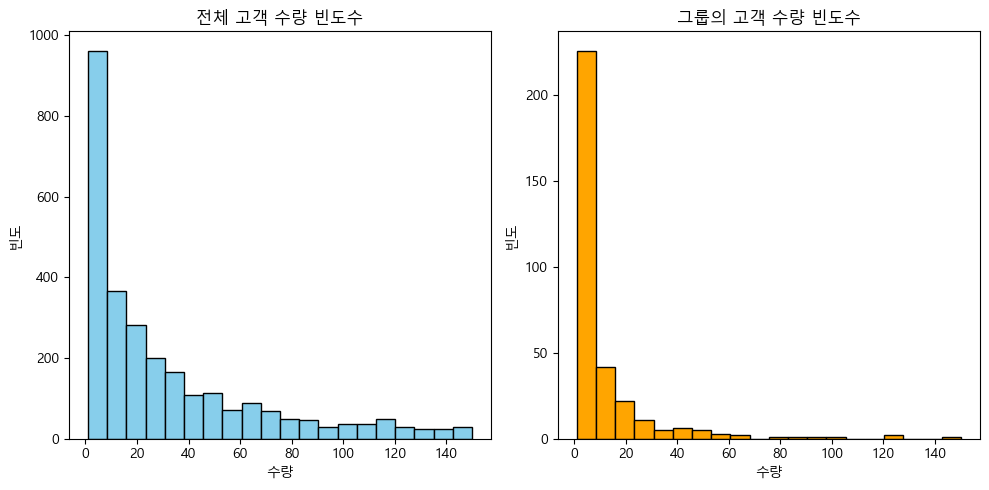

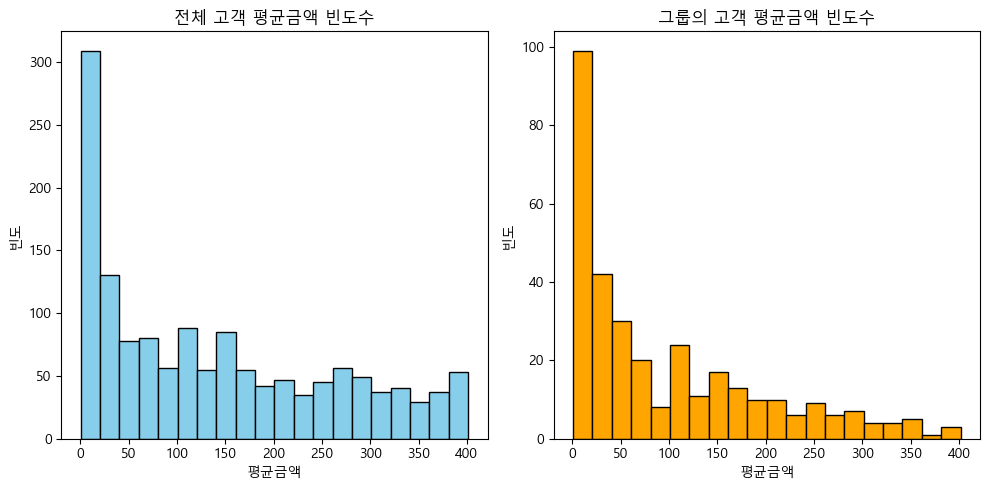

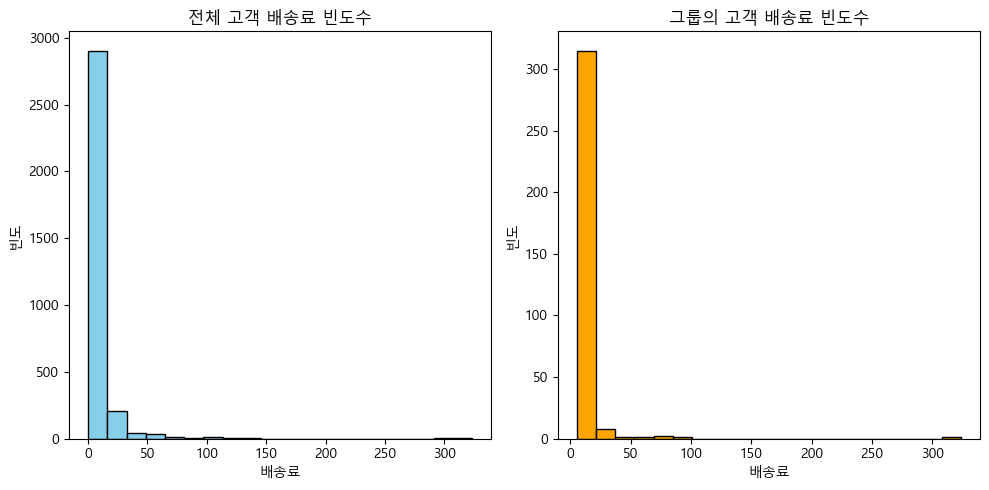

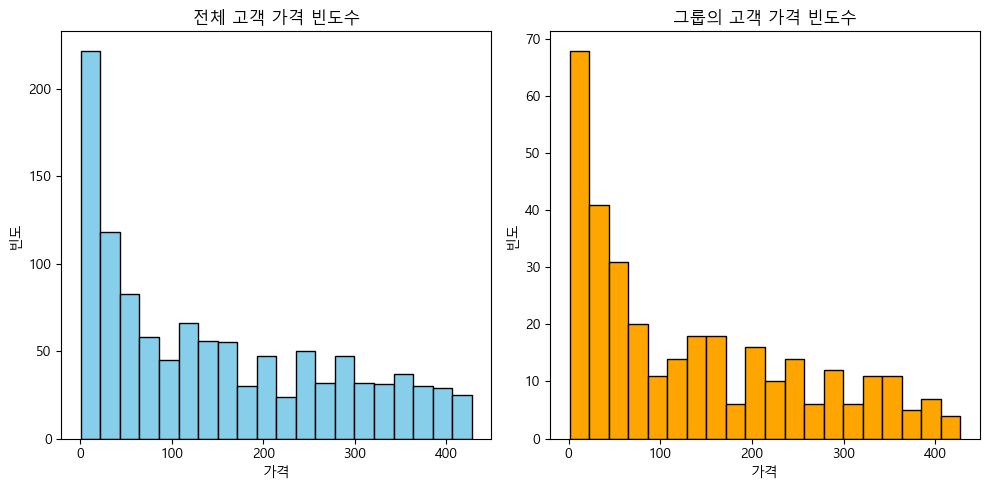

In [121]:
gg = aggregated_numerical.iloc[:,:]
online_numerical_graph(online_aggregated_numerical,gg)

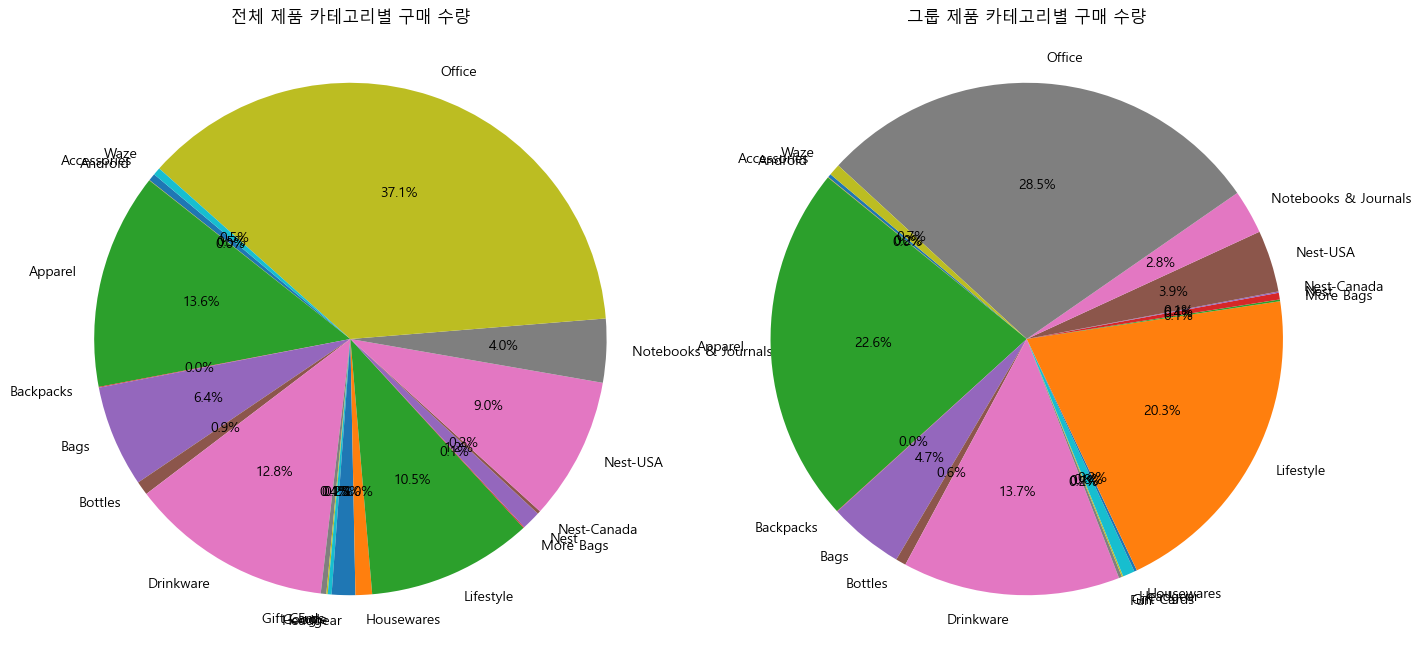

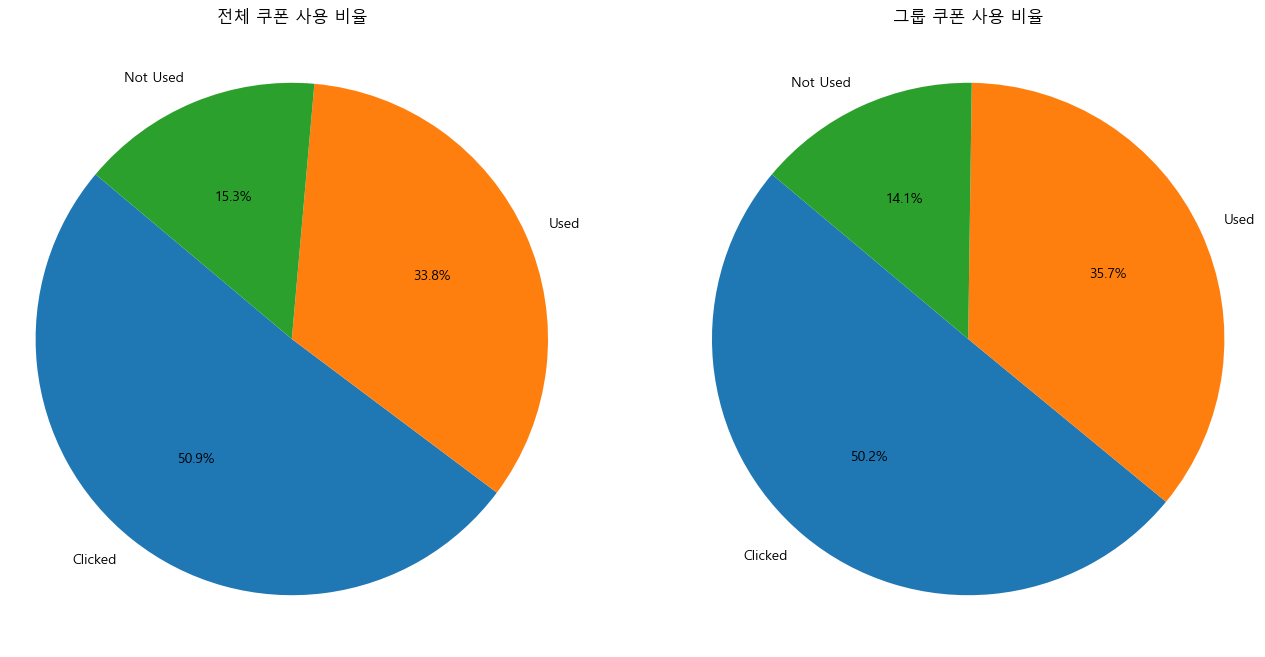

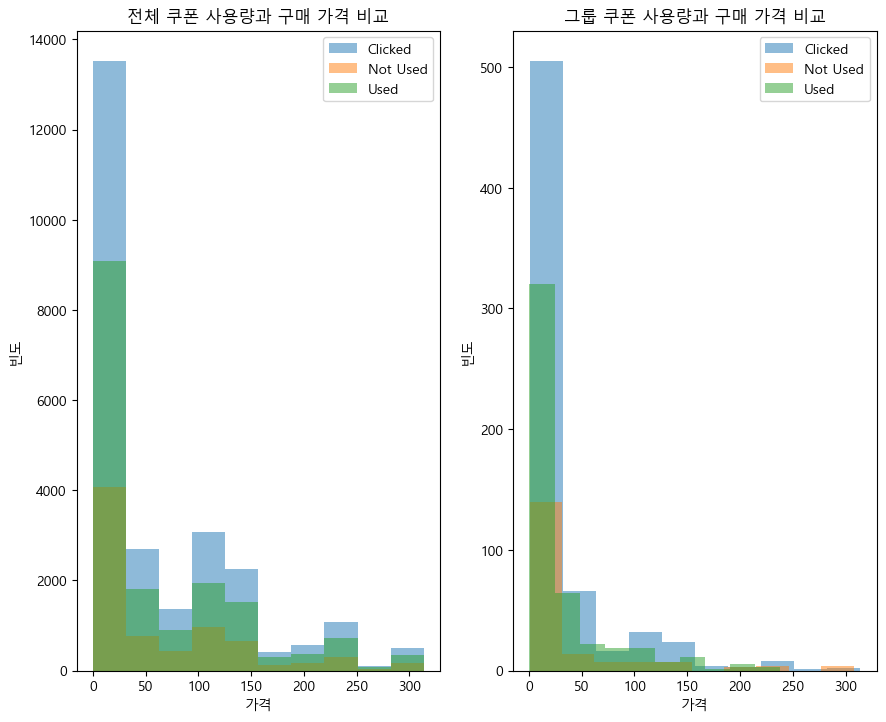

            고객ID        거래날짜          제품ID  수량      가격                제품카테고리  \
383    USER_0345  2019-01-01  Product_0971   1    1.24             Lifestyle   
1656   USER_0344  2019-01-03  Product_0981   1  153.71              Nest-USA   
1808   USER_1383  2019-01-03  Product_0922   1   11.34               Apparel   
1809   USER_1383  2019-01-03  Product_0981   1  153.71              Nest-USA   
1810   USER_1383  2019-01-30  Product_0957   1   10.31  Notebooks & Journals   
...          ...         ...           ...  ..     ...                   ...   
52759  USER_0705  2019-12-26  Product_0404   1   17.93               Apparel   
52760  USER_0705  2019-12-26  Product_0983   1  121.30              Nest-USA   
52761  USER_0705  2019-12-26  Product_1018   1    2.44                  Waze   
52817  USER_0629  2019-12-27  Product_0980   1  151.88              Nest-USA   
52818  USER_0629  2019-12-27  Product_0922   1   11.20               Apparel   

           쿠폰상태  
383     Clicked  
165

In [122]:
online_categorical_graph(online_categorical, categorical)
# office 비중이 낮고 Apparel과 lifestyle의 비중이 높음.
# 여자가 많아서??

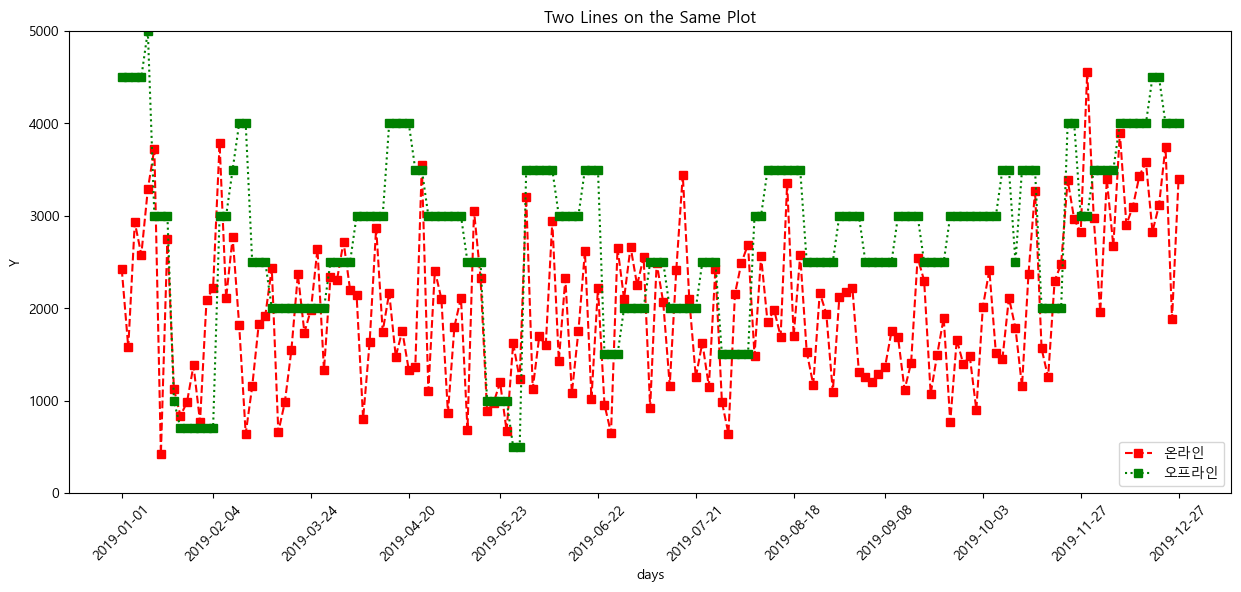

In [125]:
tmp=group_0.groupby('거래날짜').count().reset_index()
tmp.rename(columns={'거래날짜': '날짜'}, inplace=True)
tmp=tmp.merge(marketing, on='날짜')
plt.figure(figsize=(15, 6))

plt.plot(tmp['날짜'], tmp['온라인비용'], label='온라인', color='red', linestyle='--', marker='s')

plt.plot(tmp['날짜'], tmp['오프라인비용'], label='오프라인', color='green', linestyle=':', marker='s')

plt.legend()
plt.title('Two Lines on the Same Plot')
plt.xlabel('days')
plt.ylabel('Y')
plt.ylim(0, 5000)
num_labels = 12  # 원하는 레이블 수
x_ticks = np.linspace(0, len(tmp['날짜']) - 1, num_labels, dtype=int)  # 데이터 포인트에 따른 x축 위치 계산
plt.xticks(x_ticks, tmp['날짜'][x_ticks], rotation=45)  # 계산된 위치에 레이블 표시
plt.show()

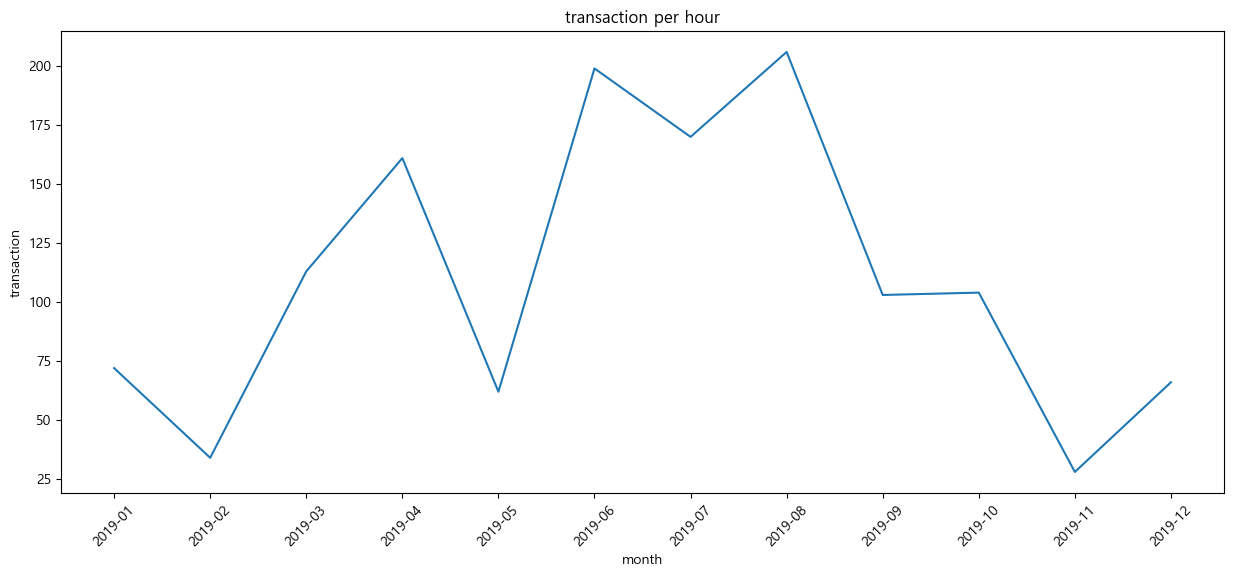

In [124]:
counts_by_month = group_0.assign(Month=pd.to_datetime(group_0['거래날짜']).dt.to_period('M'))['Month'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x=counts_by_month.index.astype(str), y=counts_by_month.values)
plt.title('transaction per hour')
plt.xlabel('month')
plt.ylabel('transaction')
plt.xticks(rotation=45)
plt.show()

# 연말에 많이 없고 6월, 4월에 튄다. -> 저때 사고 마는 고객군, 하지만 그때 역시 fmv가 낮아 마케팅의 의미를 찾기 어려움
# 그나마 겨울에 할인을 많이 함에도 구매하지 않는 것으로 보아, 3월말~여름에 옷, 라이프스타일 카테고리의 할인율을 높여주면 좋을 듯 

## 1번 고객군

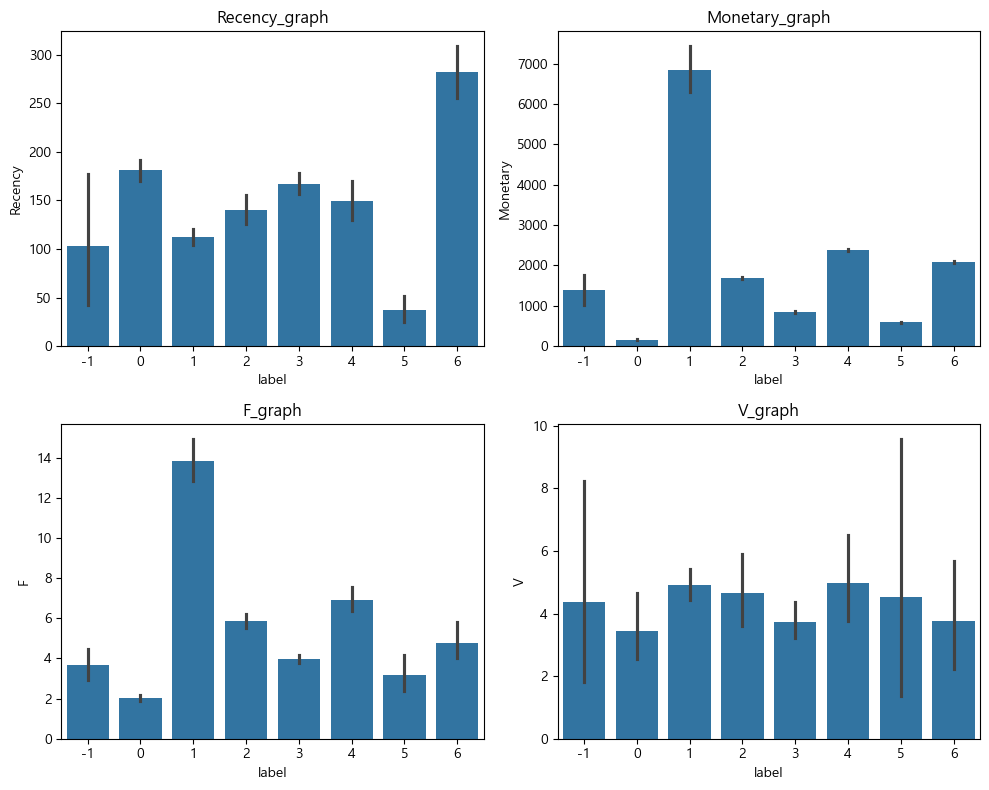

가장 우수한 고객군! VIP! R은 짧은 반면 FMV가 타고객군 1위. 특히 MV는 압도적

### Customer